In [1]:
from keras.models import load_model
from keras.datasets import mnist
from keras import backend as K
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
var_path = 'resultados/network_3/'
image_path = 'apresentacao_tex/images/resultados/network_3'

Load no dataset original, apenas para pegar um exemplo de imagem sem nenhum pre-processamento.

In [3]:
dataset = mnist.load_data()

Essas informações abaixo devem ser consistentes com o modelo treinado. 

In [4]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()
qtd_linhas = 28
qtd_colunas = 28
numero_classes = 10  # temos de 0 a 9 no dataset
num_filtros = 32


X_treino = X_treino.reshape(X_treino.shape[0], qtd_linhas, qtd_colunas, 1).astype('float')
X_teste = X_teste.reshape(X_teste.shape[0], qtd_linhas, qtd_colunas, 1).astype('float')

y_treino = to_categorical(y_treino, numero_classes)
y_teste = to_categorical(y_teste, numero_classes)

## Ler o modelo treinado

In [5]:
modelo = load_model(var_path + '/model_trained.h5')
modelo.load_weights(var_path + '/weights.h5')
modelo.evaluate(X_teste, y_teste)



10000/10000 [==============================] - 23s    


[0.4170722895383836, 0.97360000000000002]

## Definição da visualização do modelo 

convolution2d_1
activation_1
convolution2d_2
activation_2
convolution2d_3
activation_3
maxpooling2d_1
convolution2d_4
activation_4
flatten_1
dense_1
dropout_1
activation_5
dense_2
dropout_2
activation_6


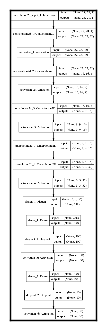

In [6]:
from keras.utils.visualize_util import plot

for layer in modelo.layers:
    print layer.name
    
plot(modelo,to_file=image_path + '/model.png',show_shapes=True,show_layer_names=True)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
plt.imshow(plt.imread(image_path + '/model.png'))


# Visualizando filtros

convolution2d_1


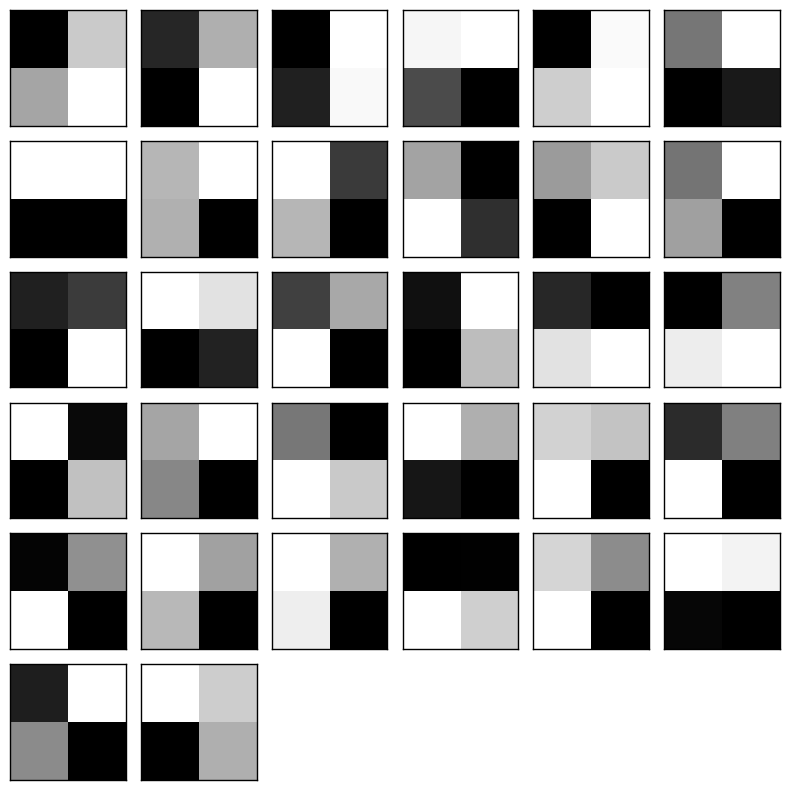

convolution2d_2


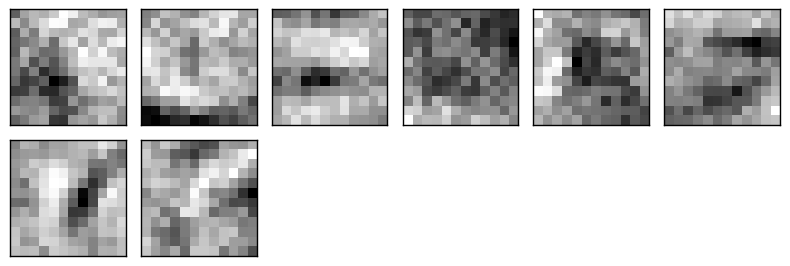

convolution2d_3


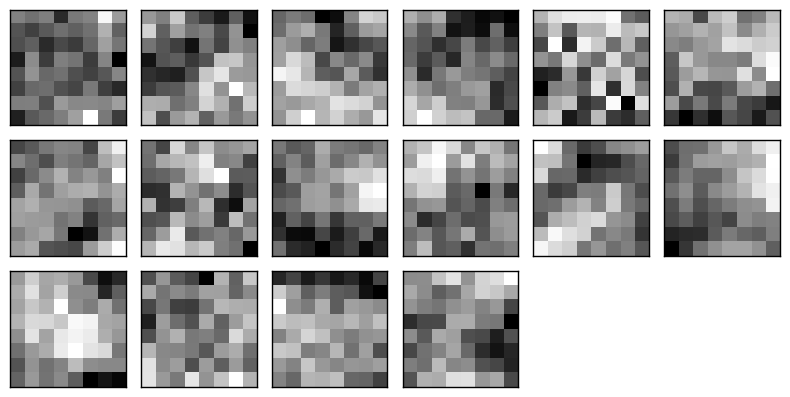

convolution2d_4


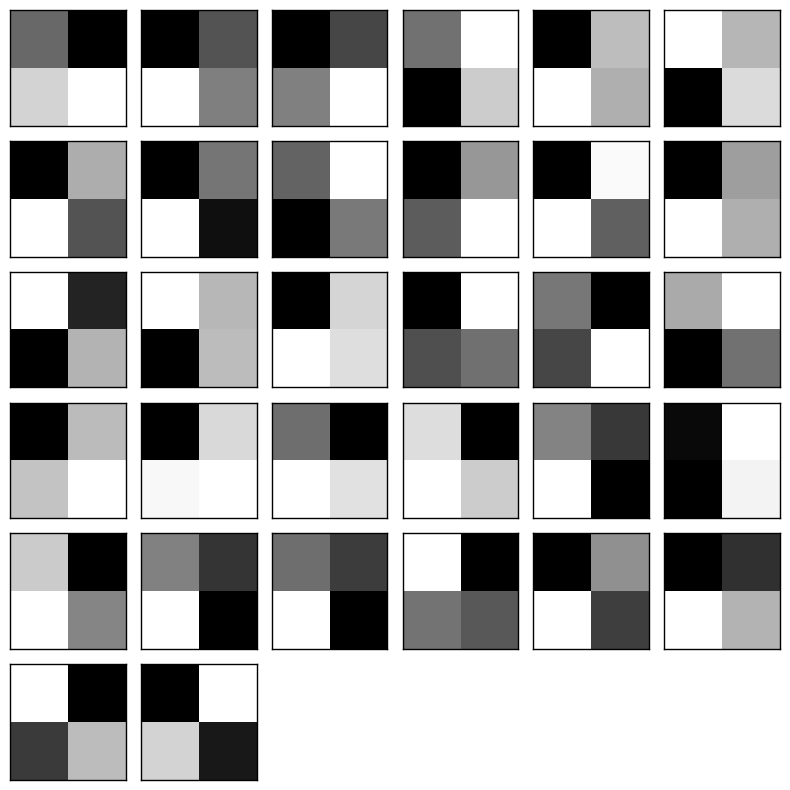

In [7]:
img = np.zeros((28,28))
for a in xrange(28):
    for b in xrange(28):
        img[a][b] = X_treino[0][a,b]
        
for i in xrange(len(modelo.layers)): # os filtros estao onde estao os layers convolucionais
    m0 = modelo.layers[i]
    name = m0.name
    if "convolution" not in name:
        continue    
    print name        
    ws = m0.get_weights()
    #print np.shape(ws[0])
    flt = np.zeros((np.shape(ws[0])[0],np.shape(ws[0])[1]))
    fig=plt.figure(figsize=(8,8))
    for oz in xrange(np.shape(ws[0])[2]):
        for z in xrange(np.shape(ws[0])[3]):
            ax = fig.add_subplot(6, 6, z+1)
            sa = np.shape(ws[0])[0]
            sb = np.shape(ws[0])[1]
            for a in xrange(sa):
                for b in xrange(sb):
                    flt[a][b] = ws[0][a,b,oz,z]
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            plt.tight_layout()        
            ax.imshow(flt,interpolation='nearest', cmap=plt.cm.gray) 
    plt.savefig(image_path + '/filter_' + name + '.png')
    plt.show()

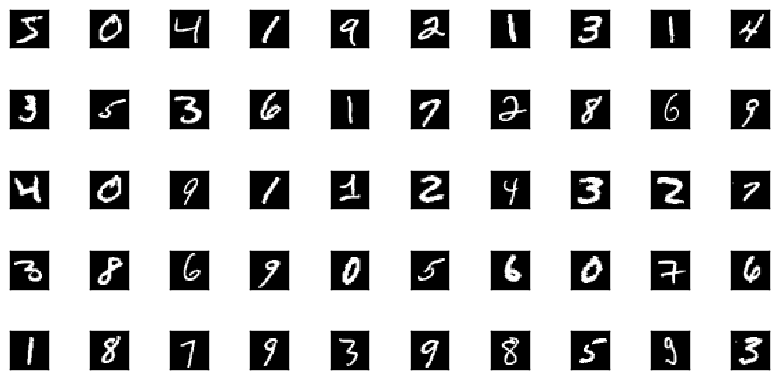

In [8]:
fig=plt.figure(figsize=(8,8))
for n in range(50):
    src = X_treino[n]
    im_h, im_w = src.shape[0], src.shape[1]
    img = np.zeros((im_h,im_w))
    ax = fig.add_subplot(10,10, n+1)
    for a in range(im_h):
        for b in range(im_w):
            img[a][b] = src[a,b,0]
    plt.tight_layout()               
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))  
    ax.imshow(img,interpolation='nearest', cmap=plt.cm.gray)
plt.show()

====================camada 0====================
convolution2d_1


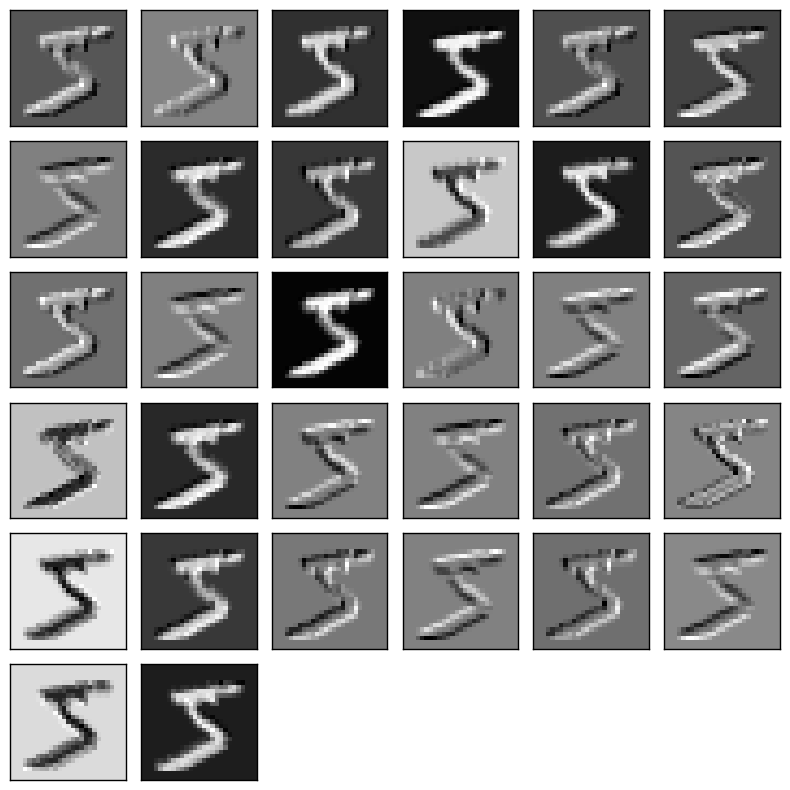

====================camada 1====================
activation_1


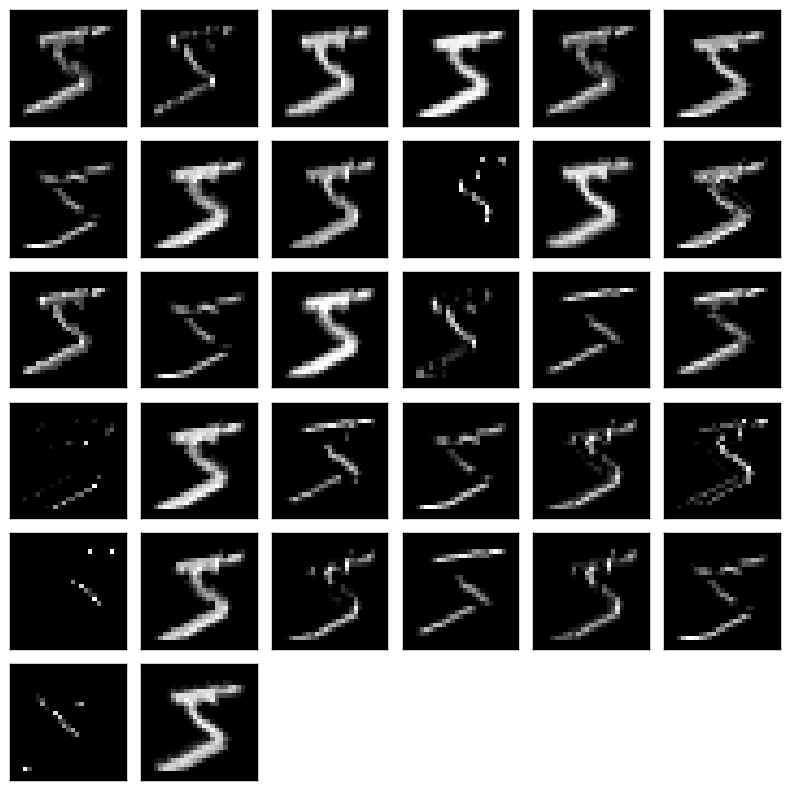

====================camada 2====================
convolution2d_2


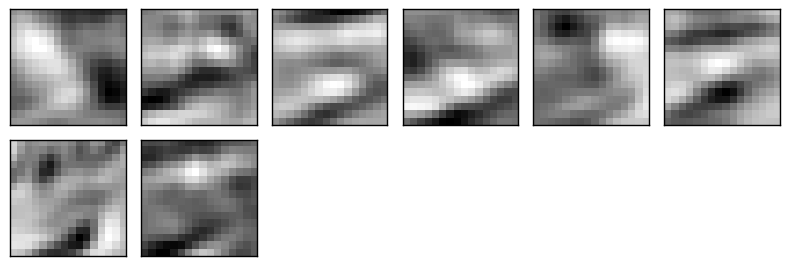

====================camada 3====================
activation_2


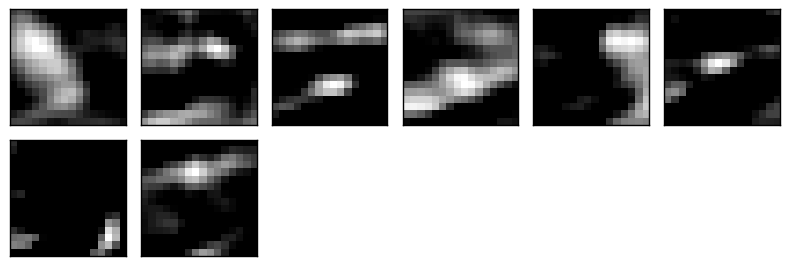

====================camada 4====================
convolution2d_3


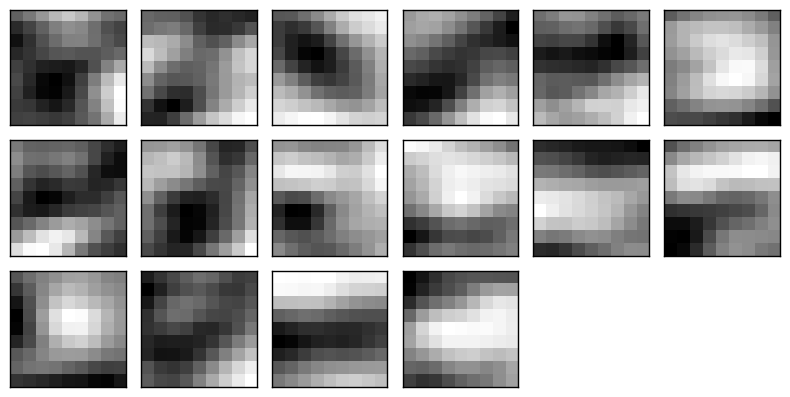

====================camada 5====================
activation_3


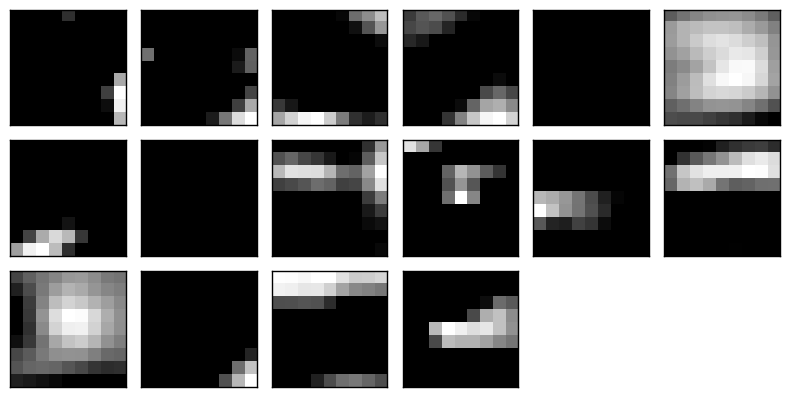

====================camada 6====================
maxpooling2d_1


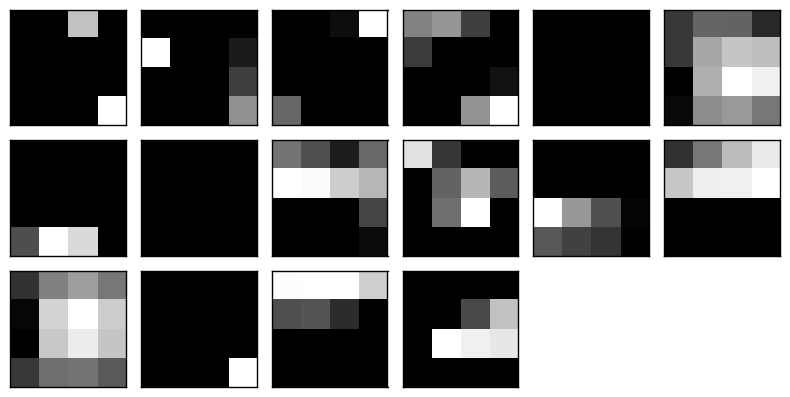

====================camada 7====================
convolution2d_4


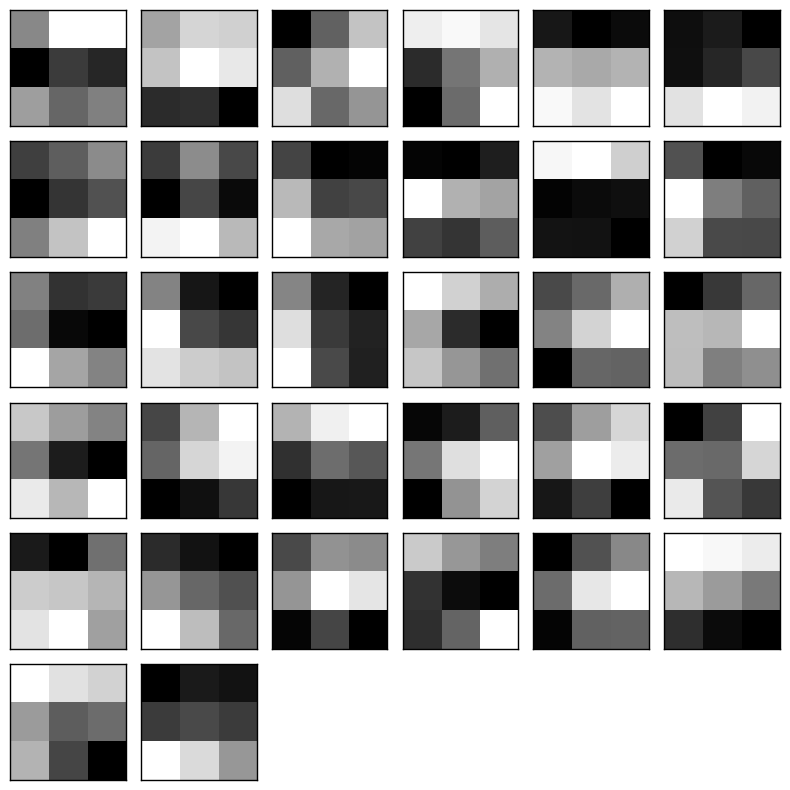

====================camada 8====================
activation_4


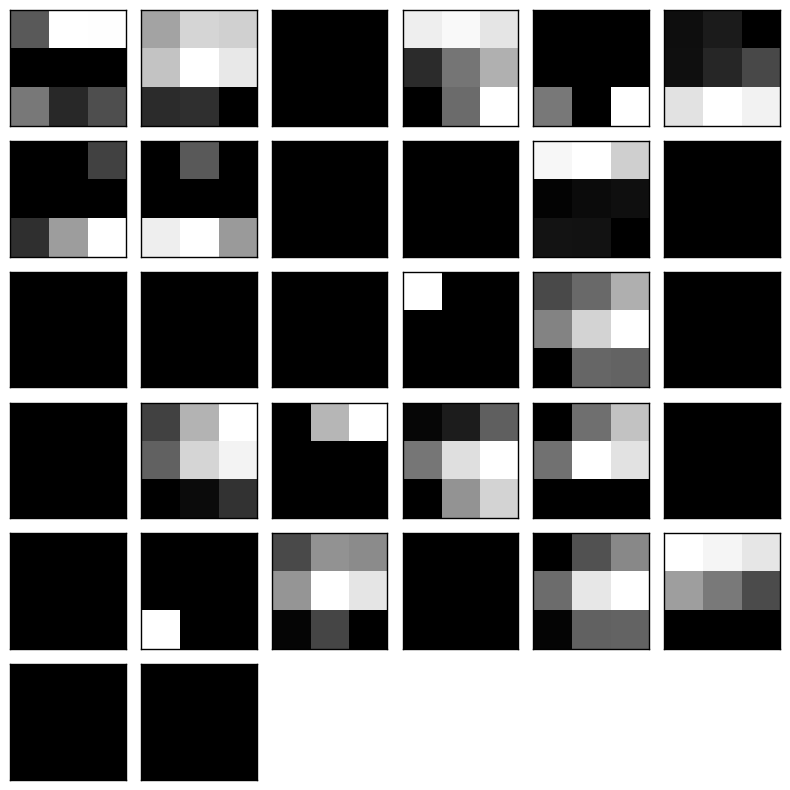

====================camada 9====================
flatten_1


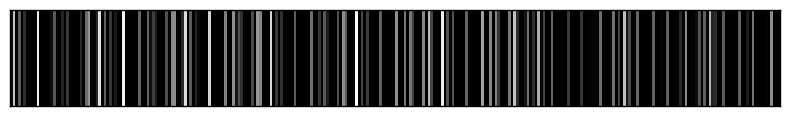

====================camada 10====================
dense_1


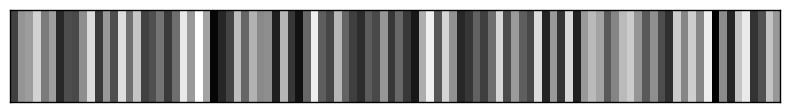

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


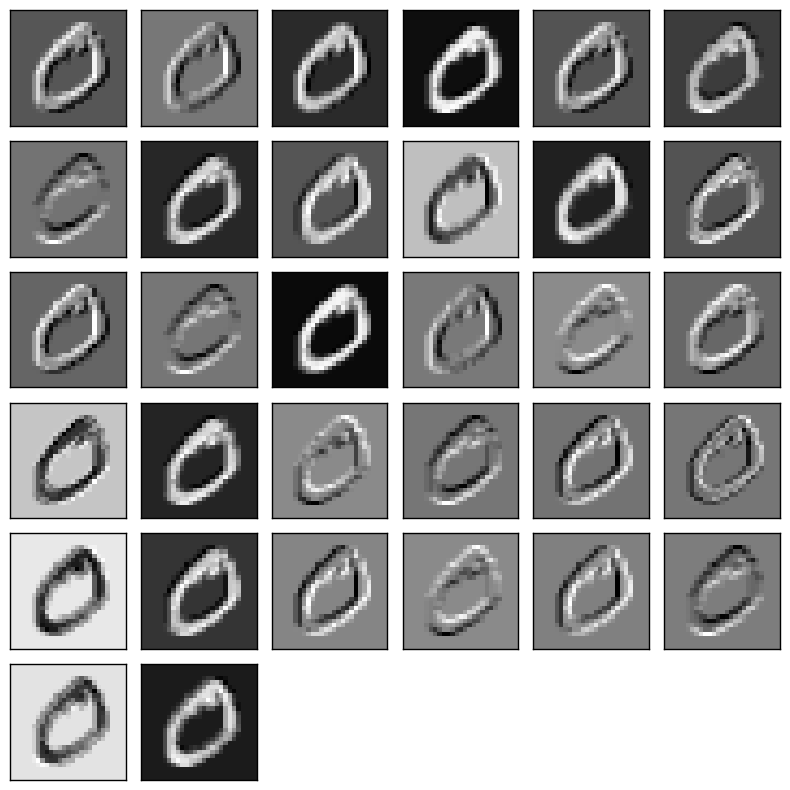

====================camada 1====================
activation_1


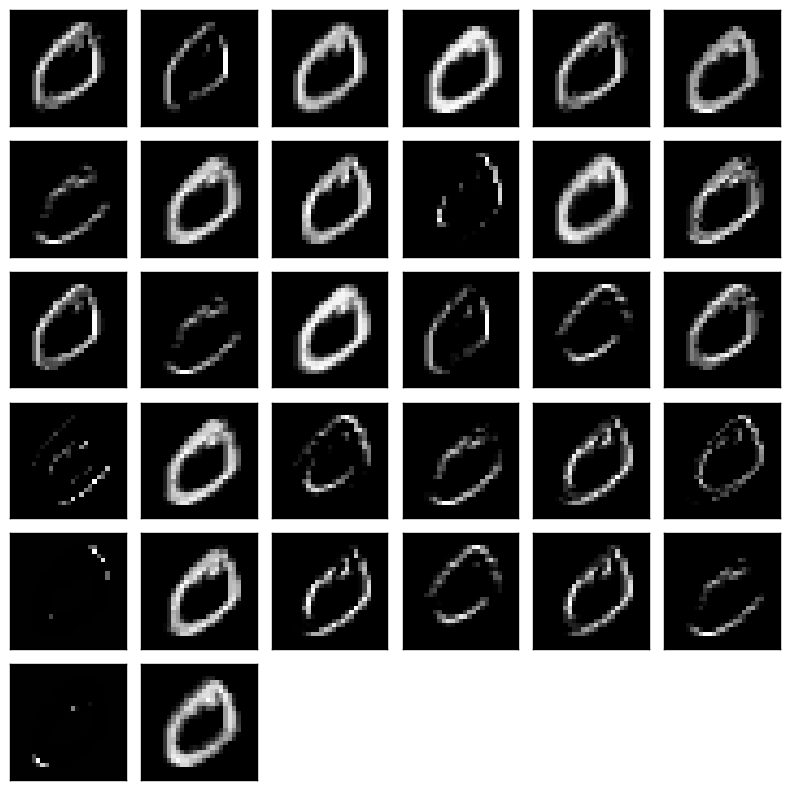

====================camada 2====================
convolution2d_2


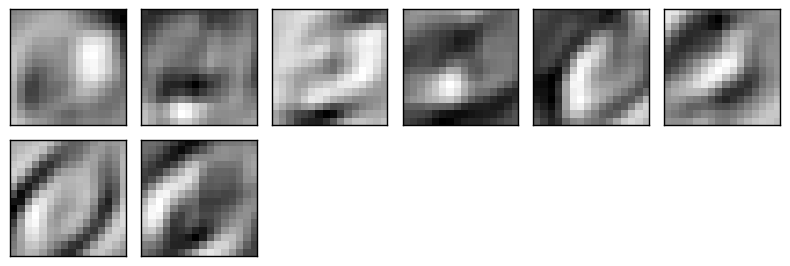

====================camada 3====================
activation_2


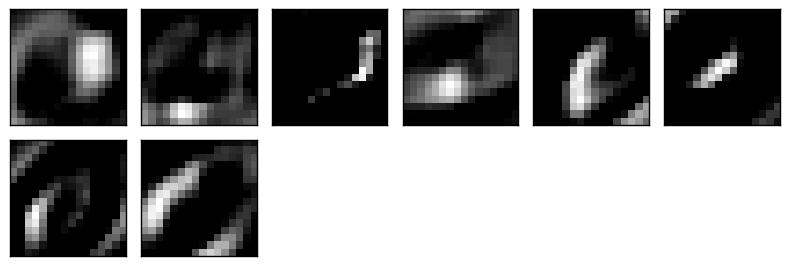

====================camada 4====================
convolution2d_3


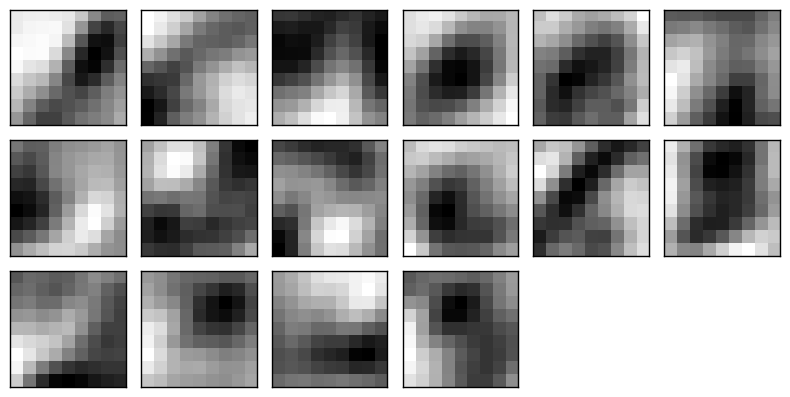

====================camada 5====================
activation_3


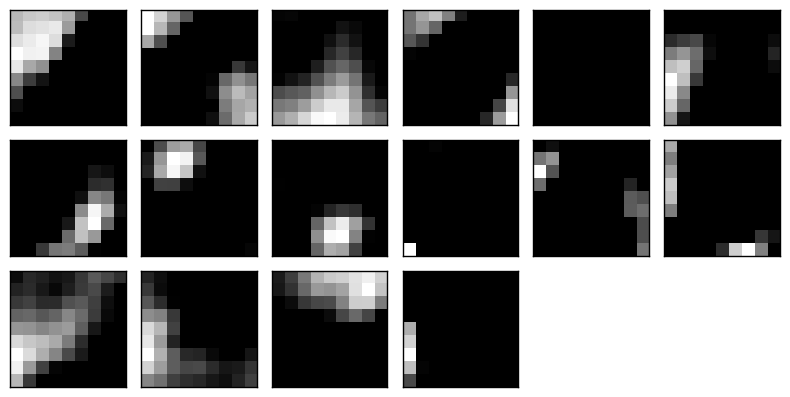

====================camada 6====================
maxpooling2d_1


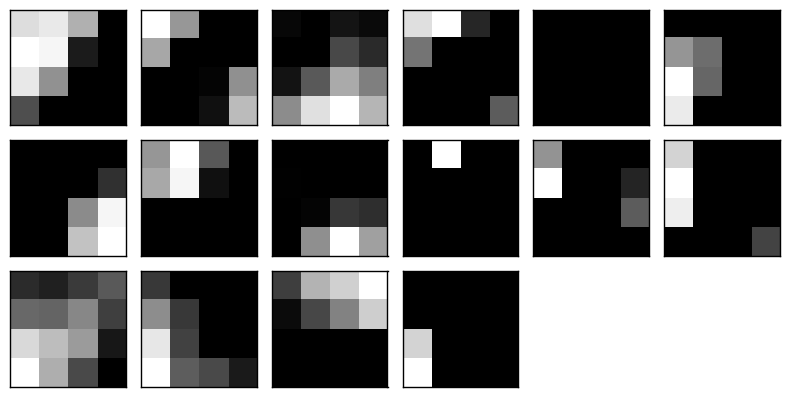

====================camada 7====================
convolution2d_4


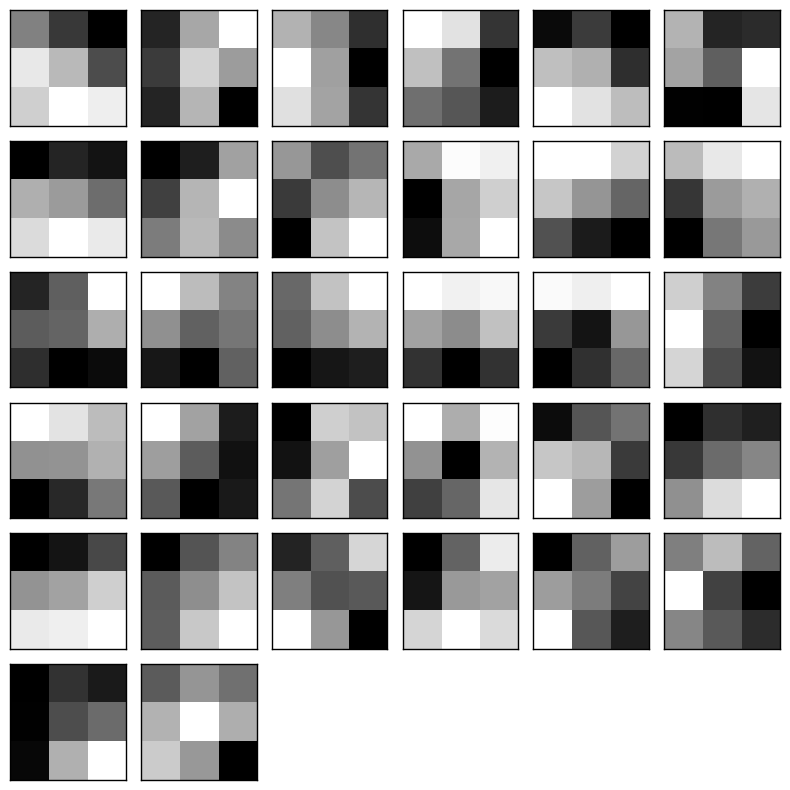

====================camada 8====================
activation_4


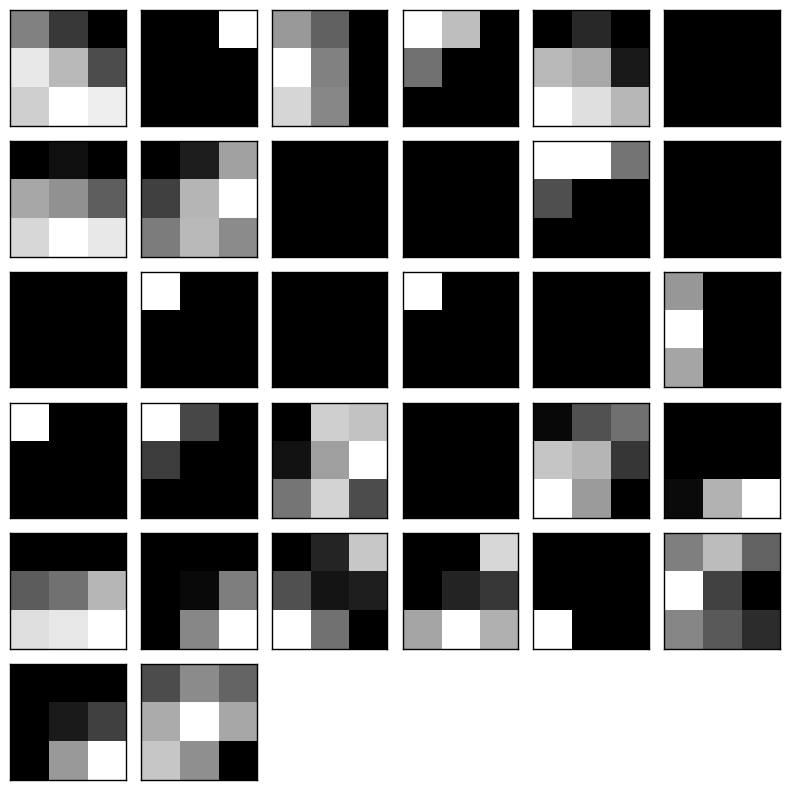

====================camada 9====================
flatten_1


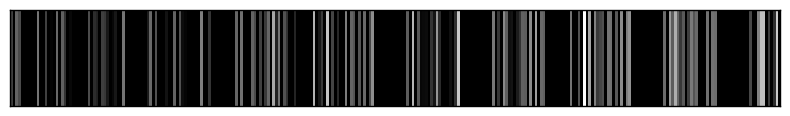

====================camada 10====================
dense_1


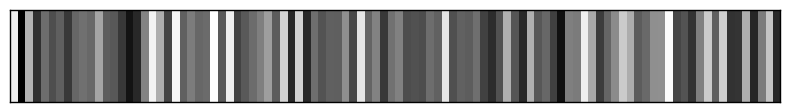

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


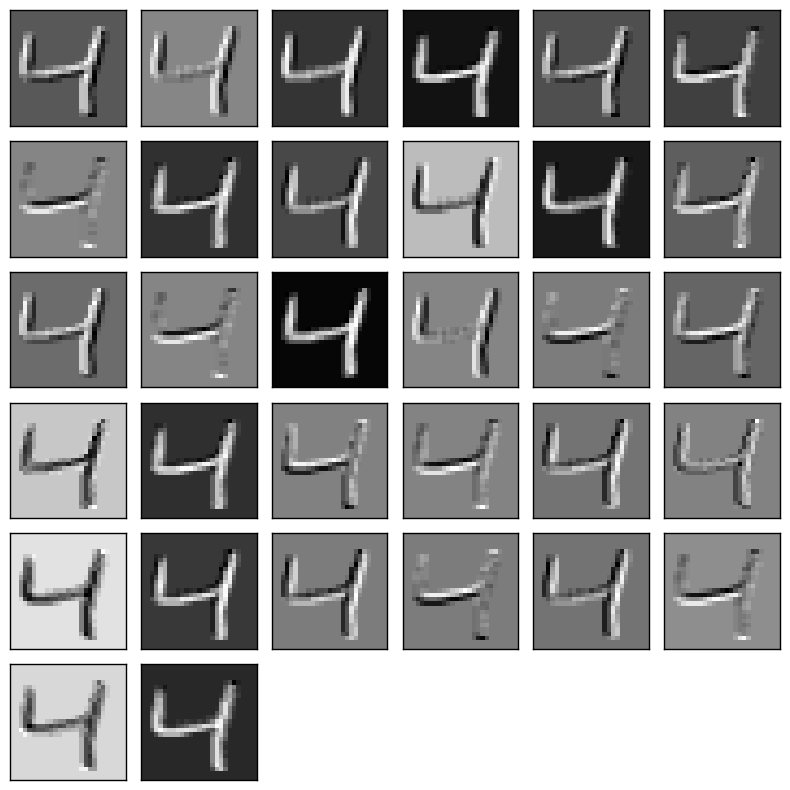

====================camada 1====================
activation_1


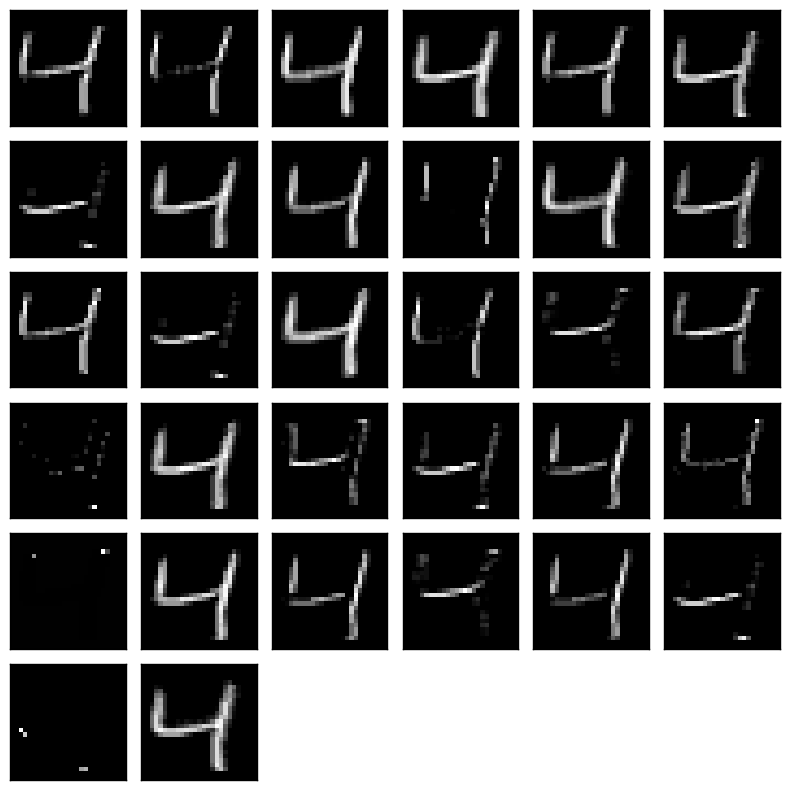

====================camada 2====================
convolution2d_2


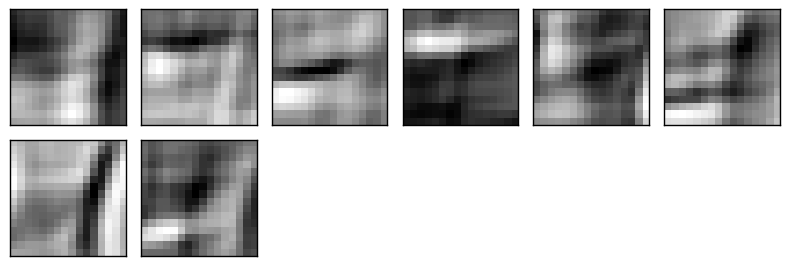

====================camada 3====================
activation_2


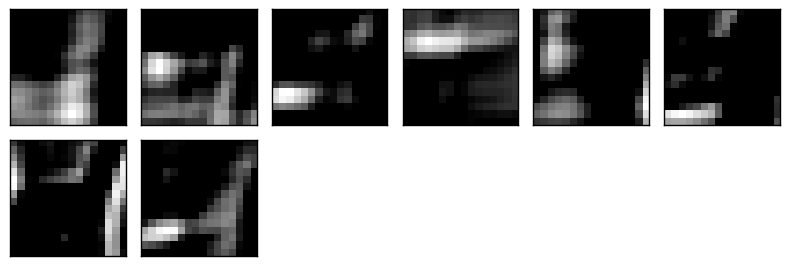

====================camada 4====================
convolution2d_3


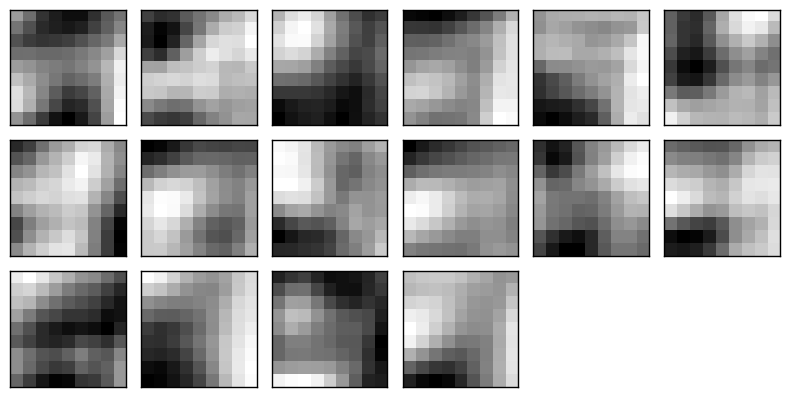

====================camada 5====================
activation_3


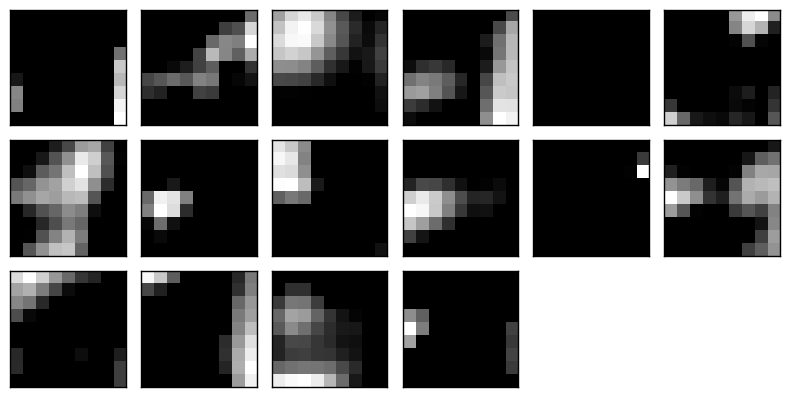

====================camada 6====================
maxpooling2d_1


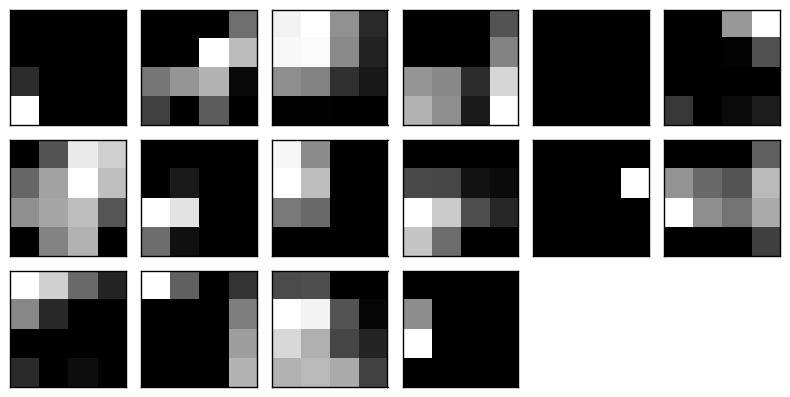

====================camada 7====================
convolution2d_4


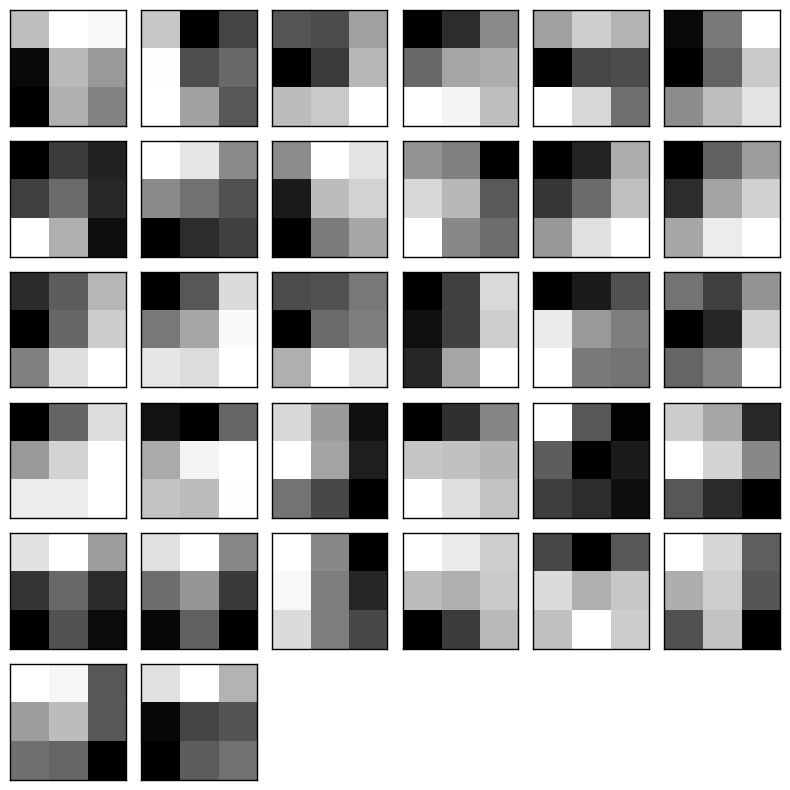

====================camada 8====================
activation_4


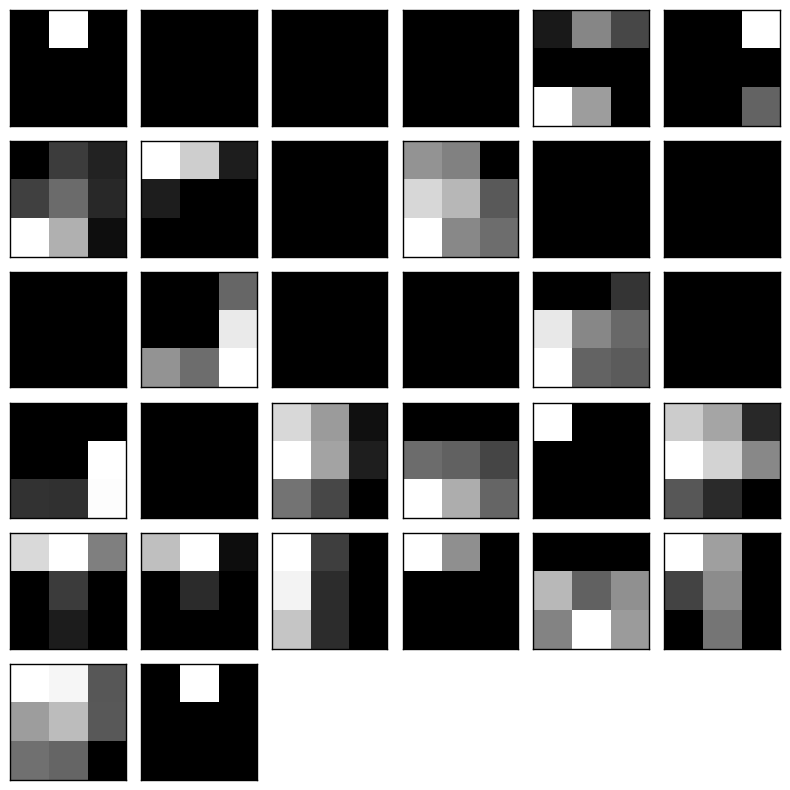

====================camada 9====================
flatten_1


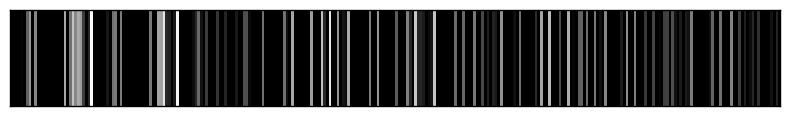

====================camada 10====================
dense_1


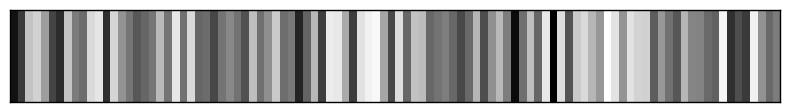

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


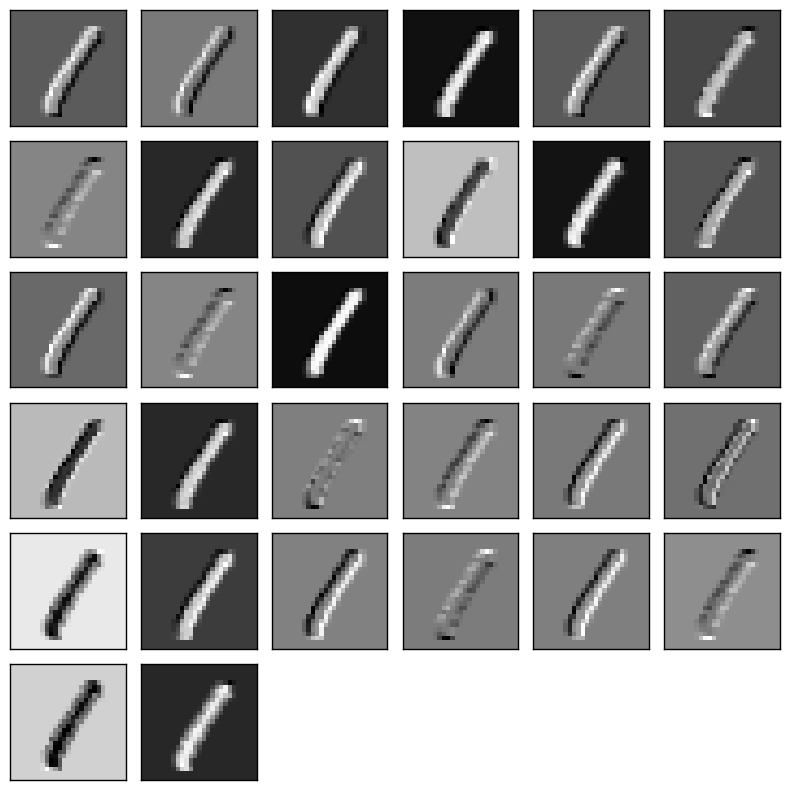

====================camada 1====================
activation_1


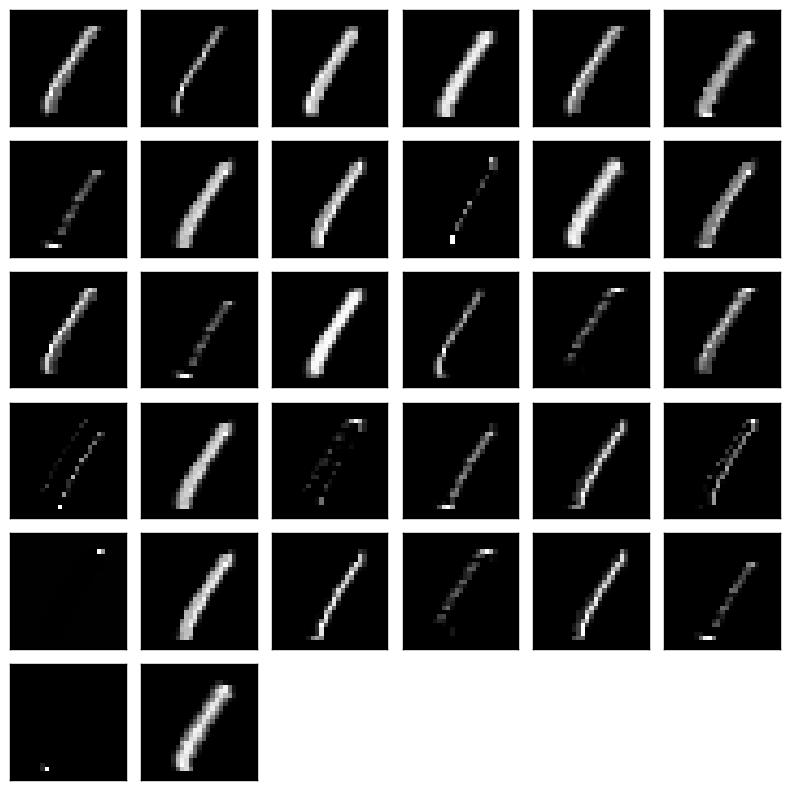

====================camada 2====================
convolution2d_2


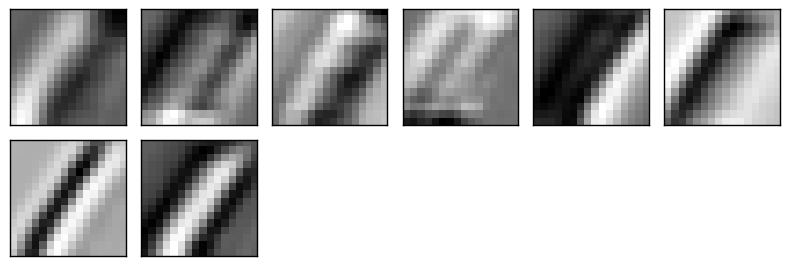

====================camada 3====================
activation_2


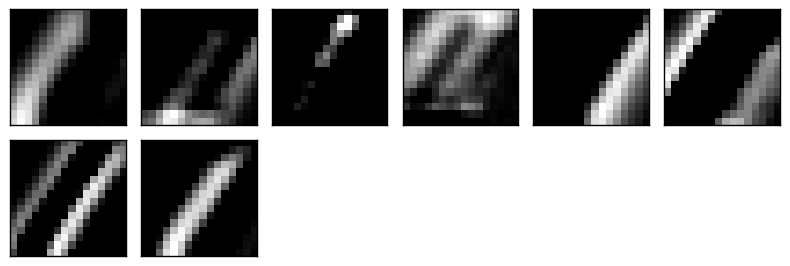

====================camada 4====================
convolution2d_3


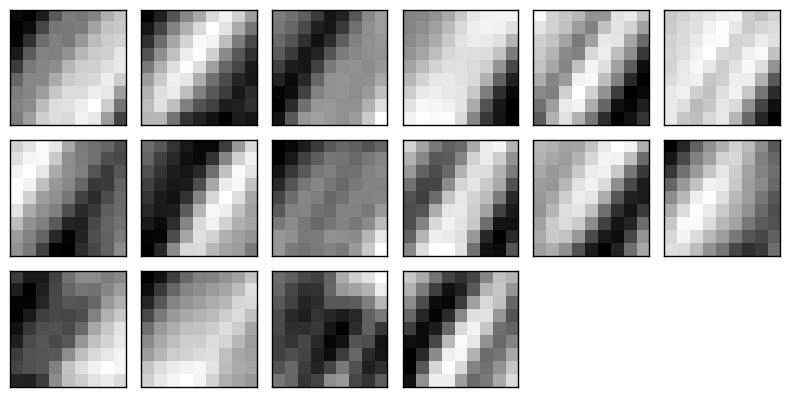

====================camada 5====================
activation_3


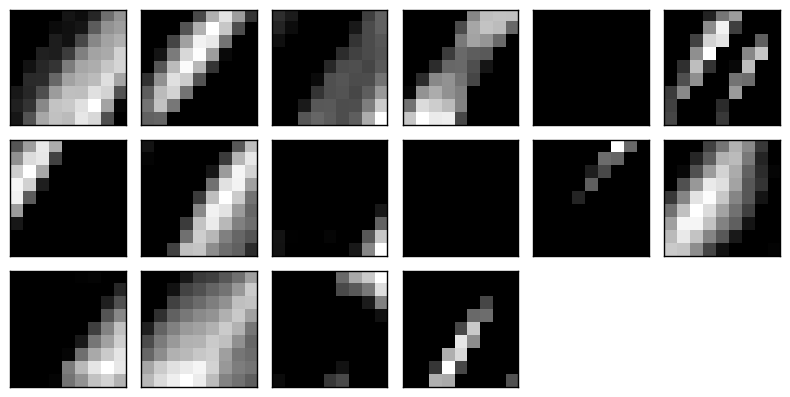

====================camada 6====================
maxpooling2d_1


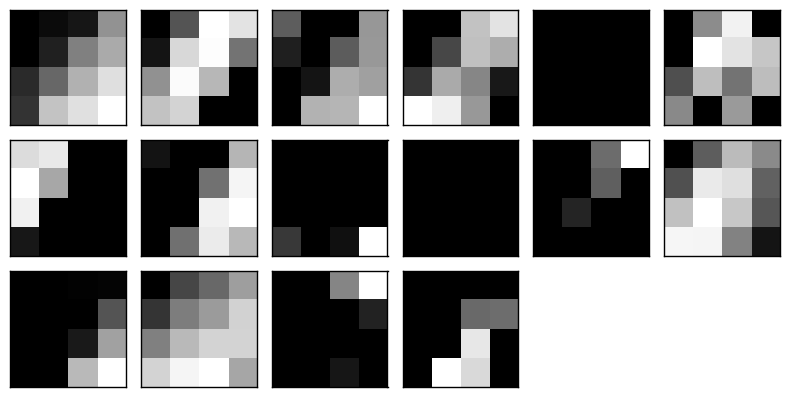

====================camada 7====================
convolution2d_4


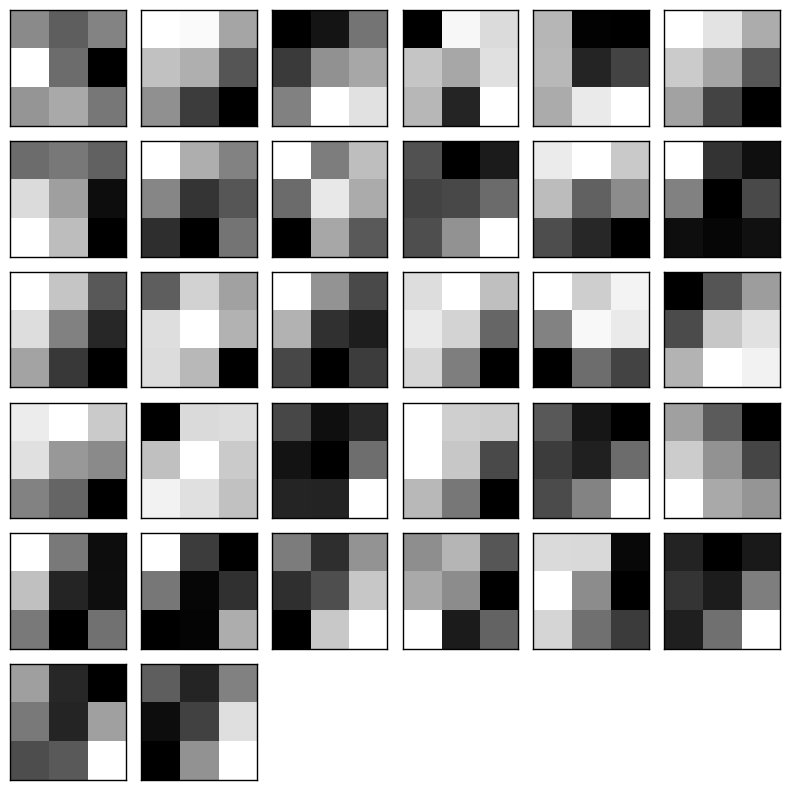

====================camada 8====================
activation_4


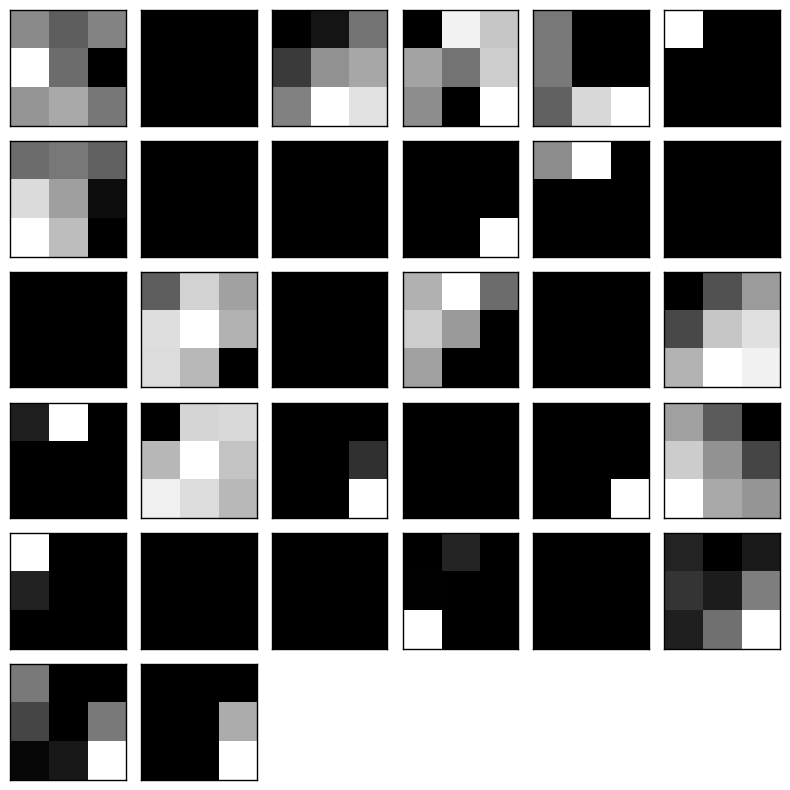

====================camada 9====================
flatten_1


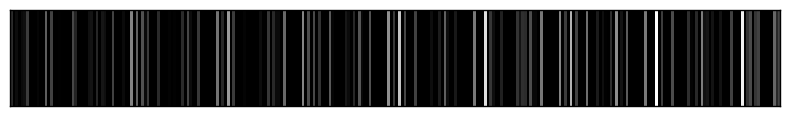

====================camada 10====================
dense_1


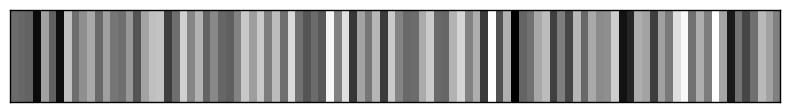

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


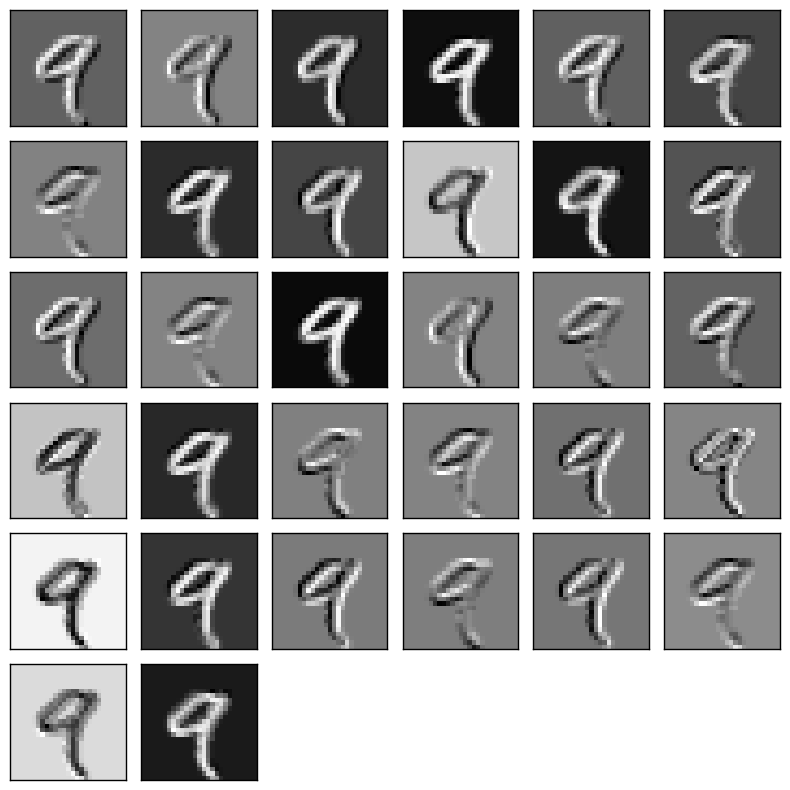

====================camada 1====================
activation_1


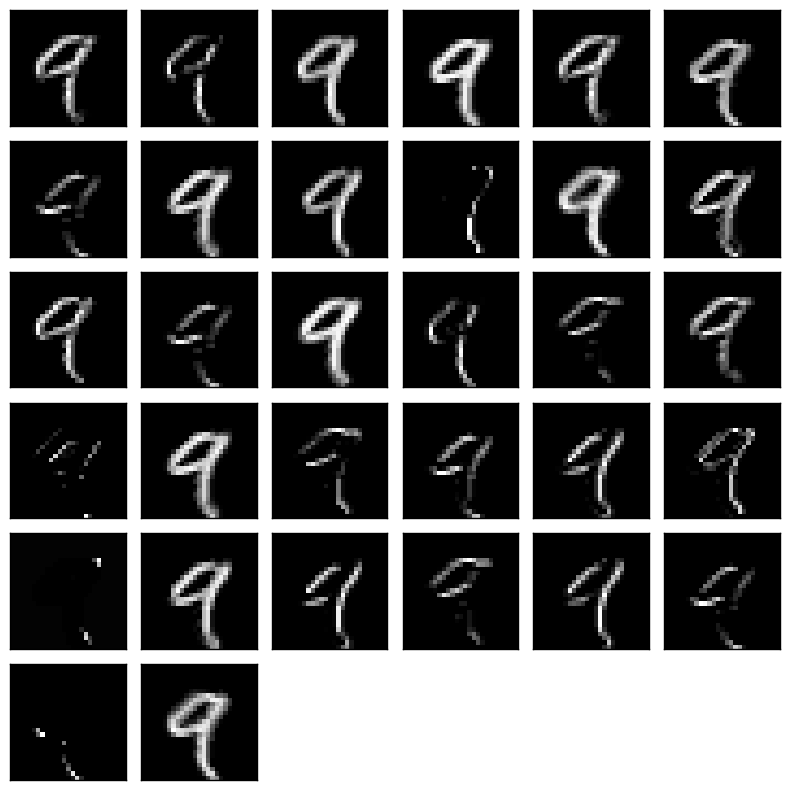

====================camada 2====================
convolution2d_2


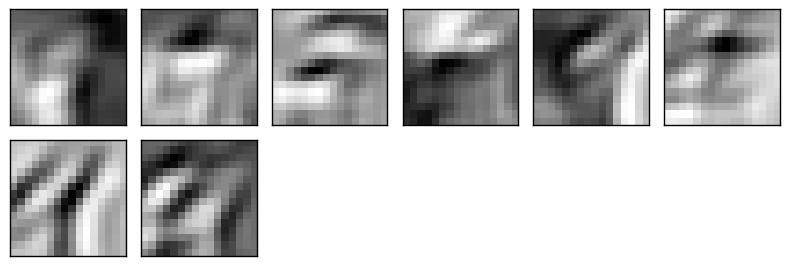

====================camada 3====================
activation_2


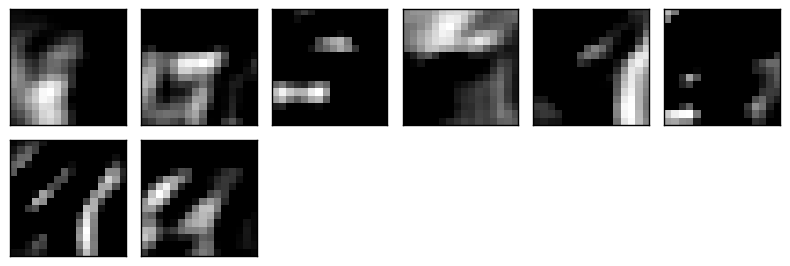

====================camada 4====================
convolution2d_3


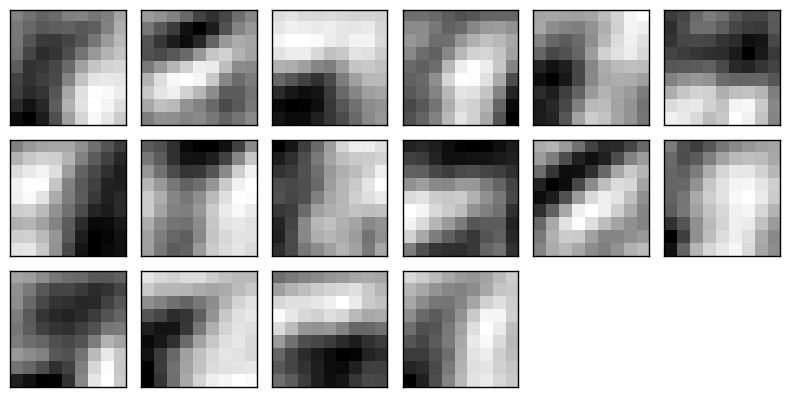

====================camada 5====================
activation_3


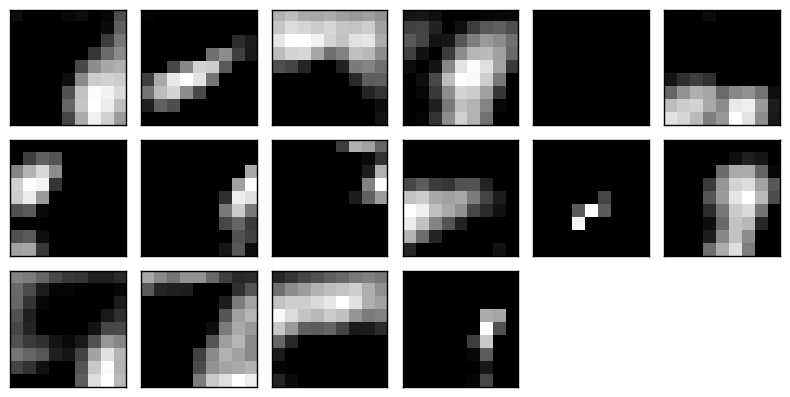

====================camada 6====================
maxpooling2d_1


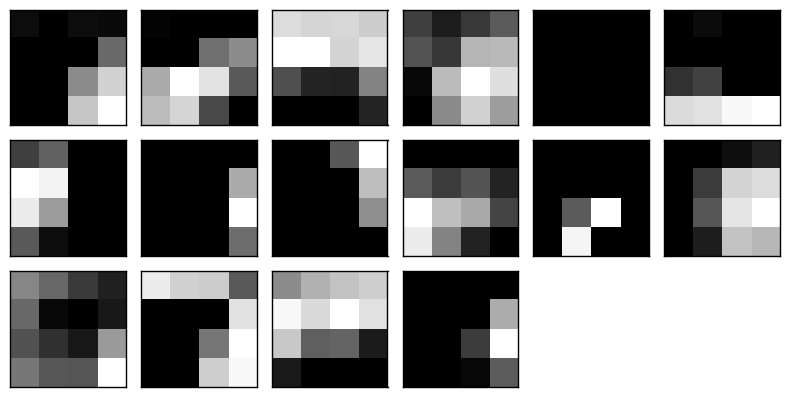

====================camada 7====================
convolution2d_4


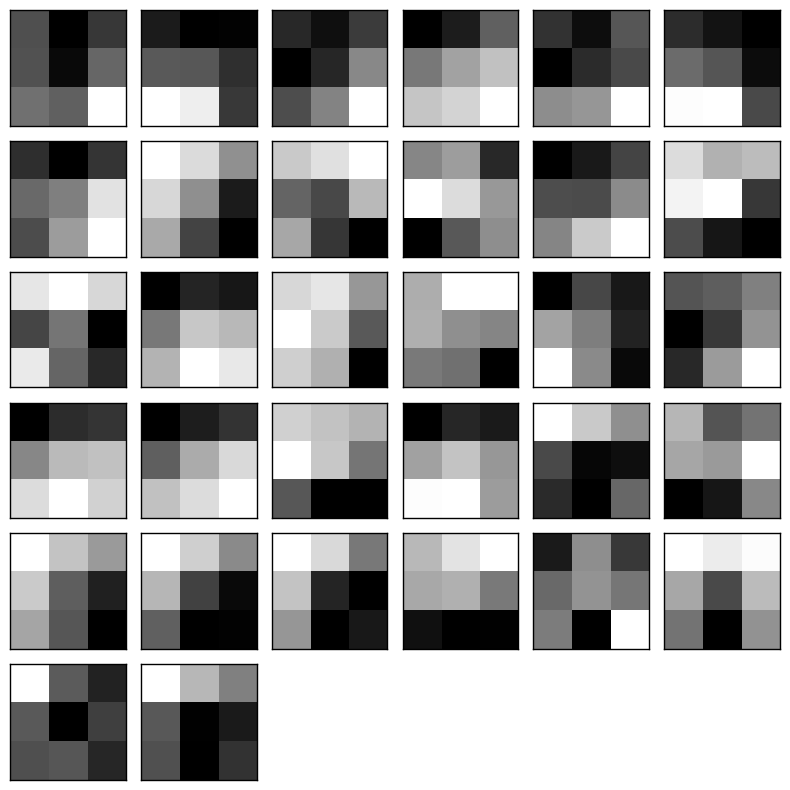

====================camada 8====================
activation_4


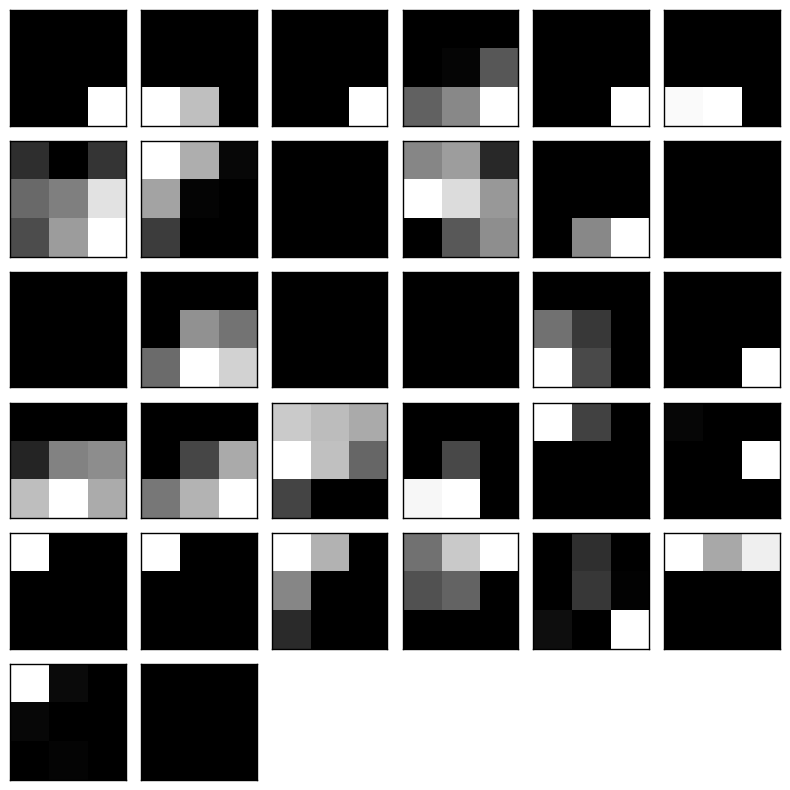

====================camada 9====================
flatten_1


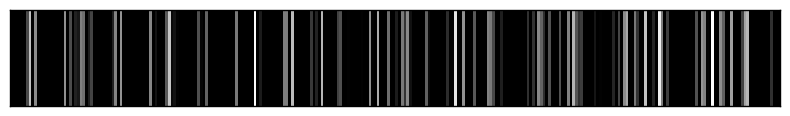

====================camada 10====================
dense_1


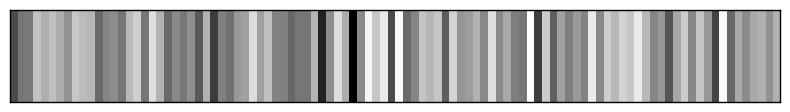

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


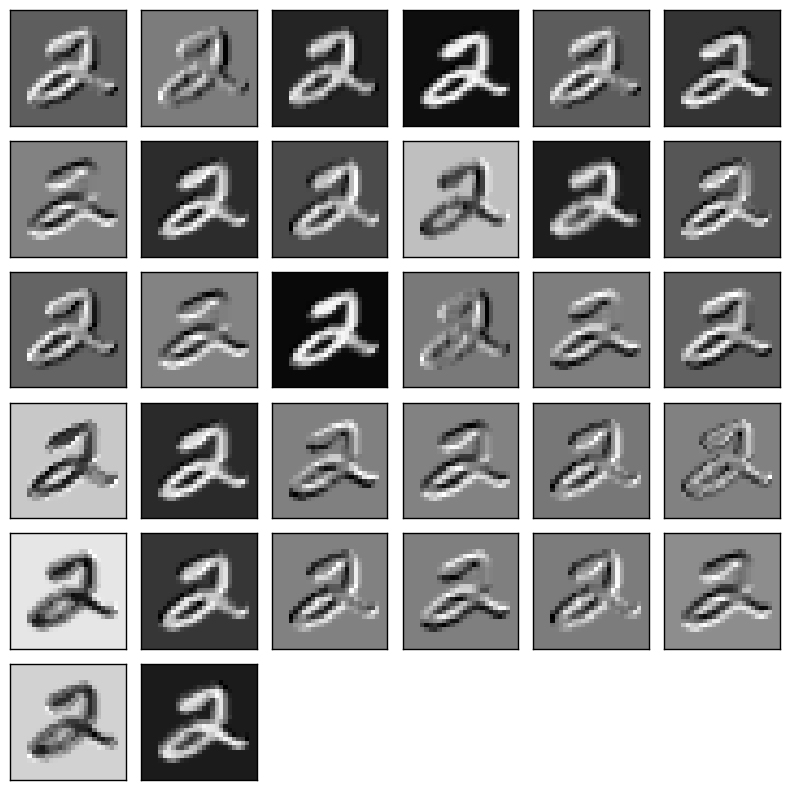

====================camada 1====================
activation_1


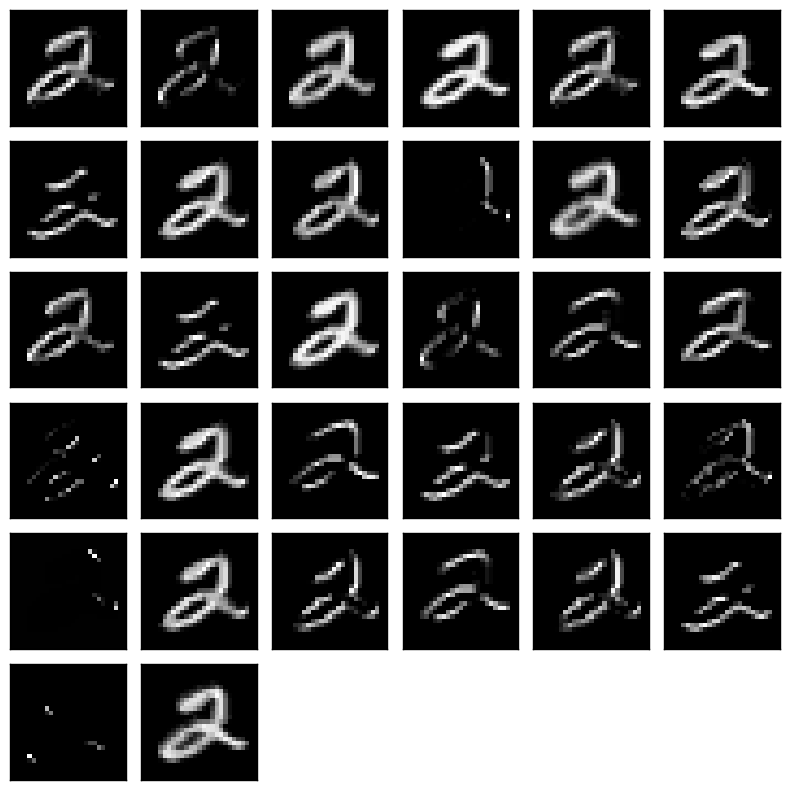

====================camada 2====================
convolution2d_2


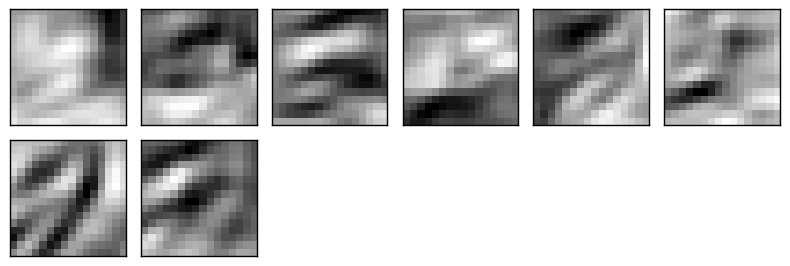

====================camada 3====================
activation_2


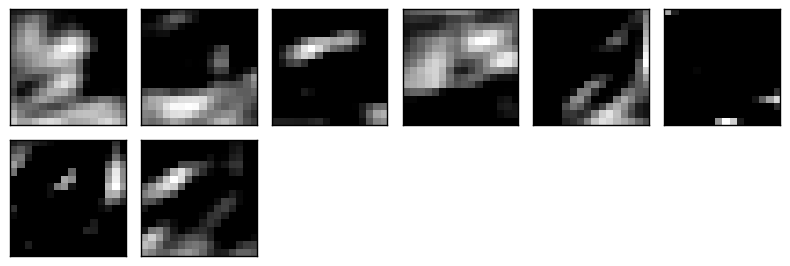

====================camada 4====================
convolution2d_3


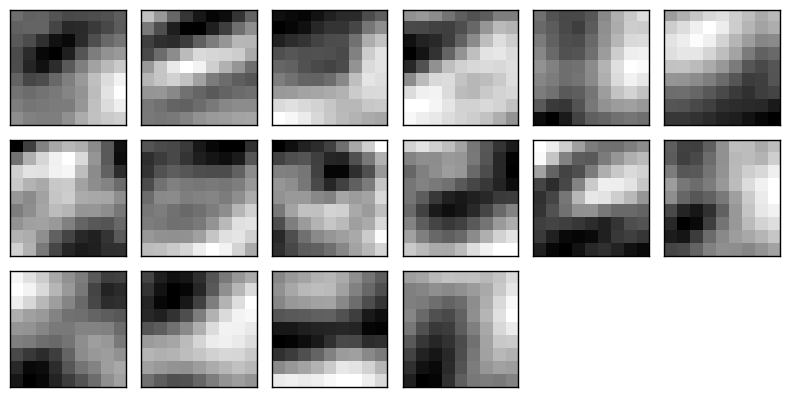

====================camada 5====================
activation_3


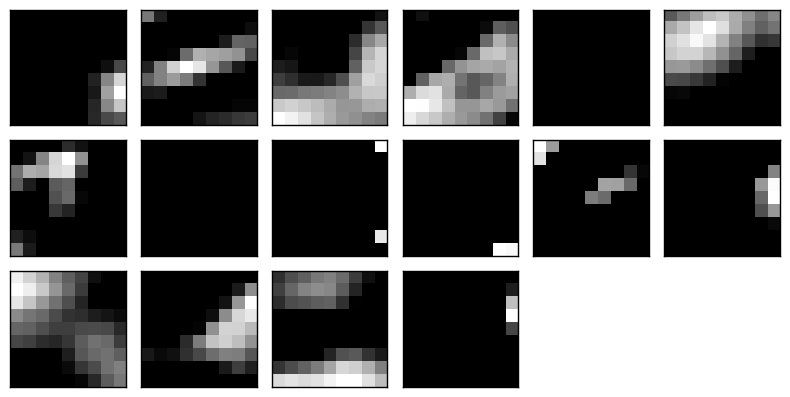

====================camada 6====================
maxpooling2d_1


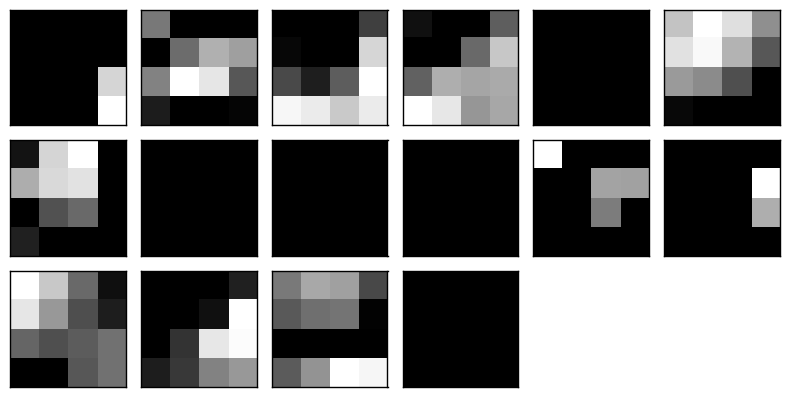

====================camada 7====================
convolution2d_4


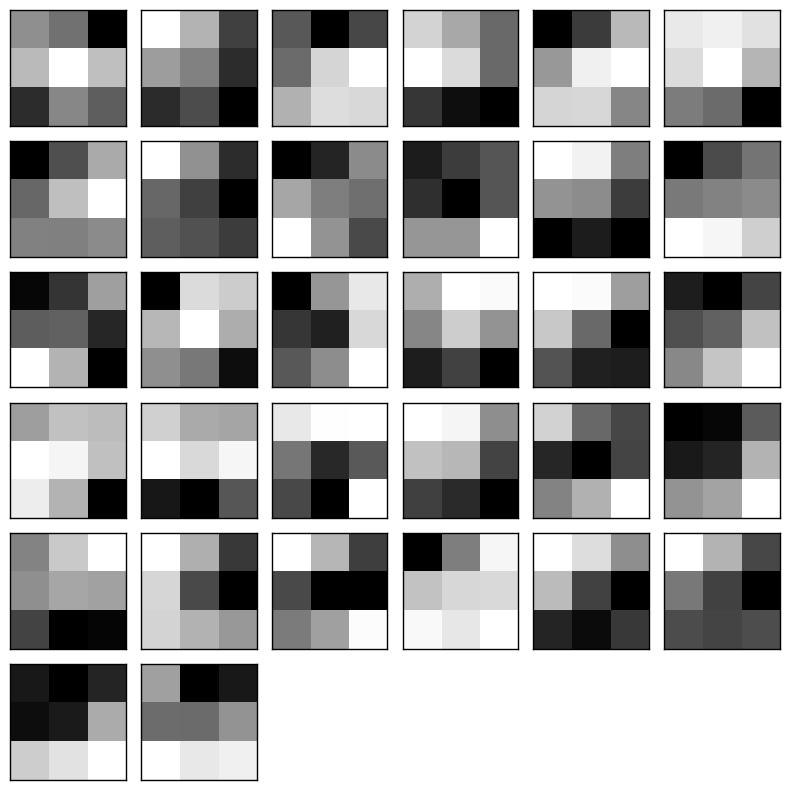

====================camada 8====================
activation_4


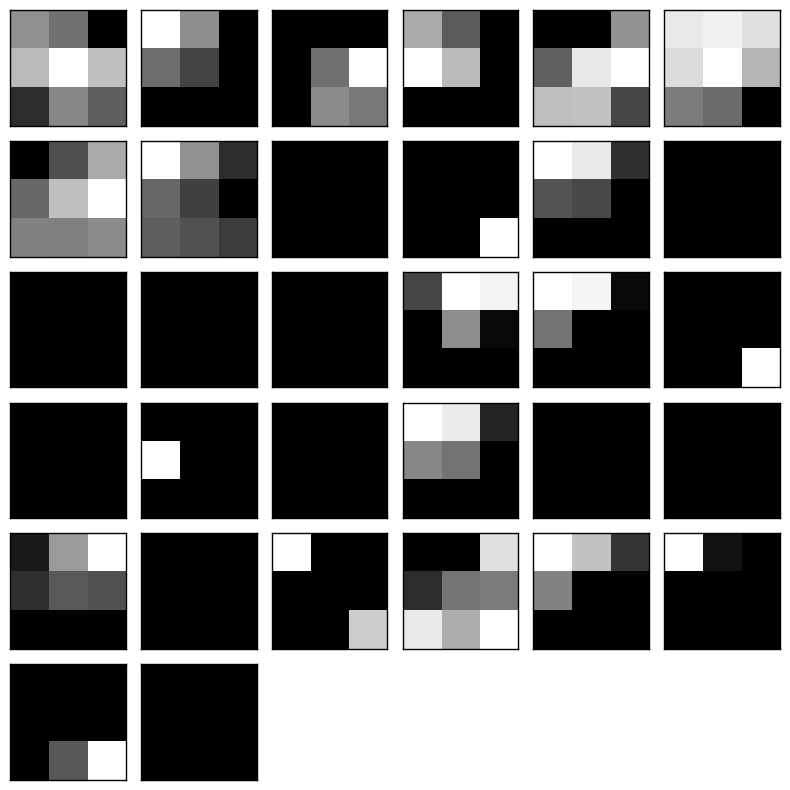

====================camada 9====================
flatten_1


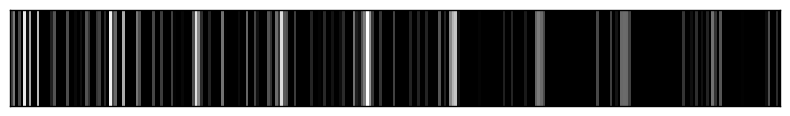

====================camada 10====================
dense_1


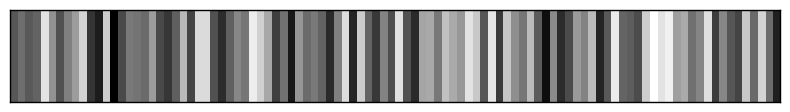

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


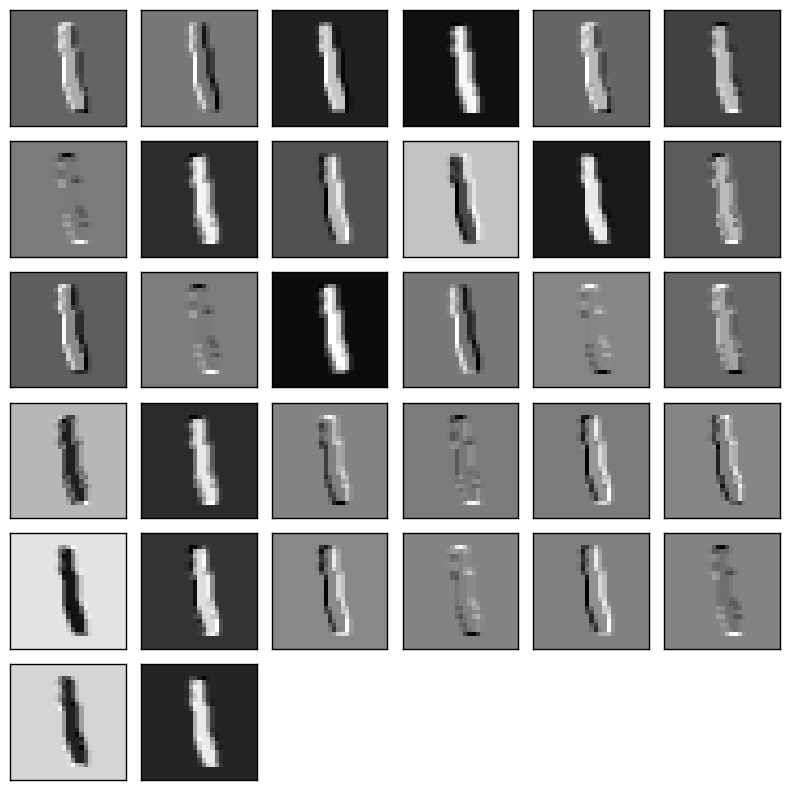

====================camada 1====================
activation_1


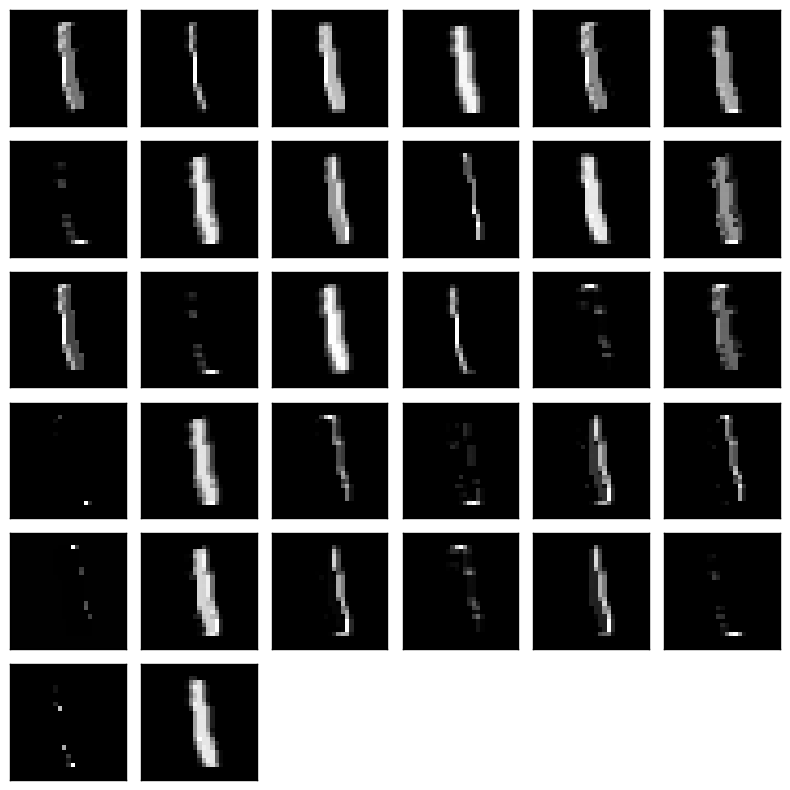

====================camada 2====================
convolution2d_2


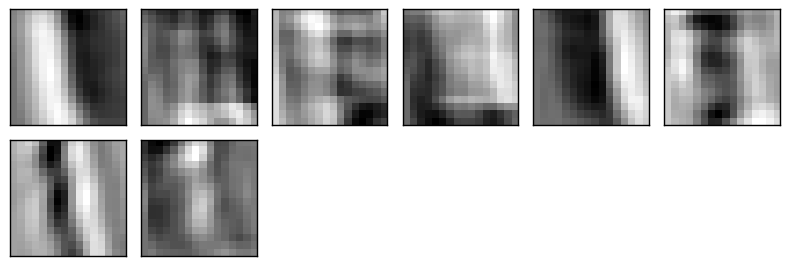

====================camada 3====================
activation_2


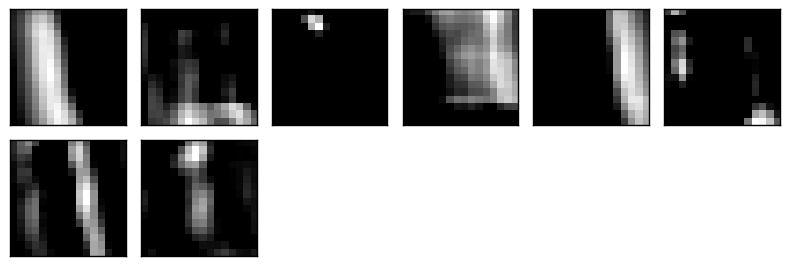

====================camada 4====================
convolution2d_3


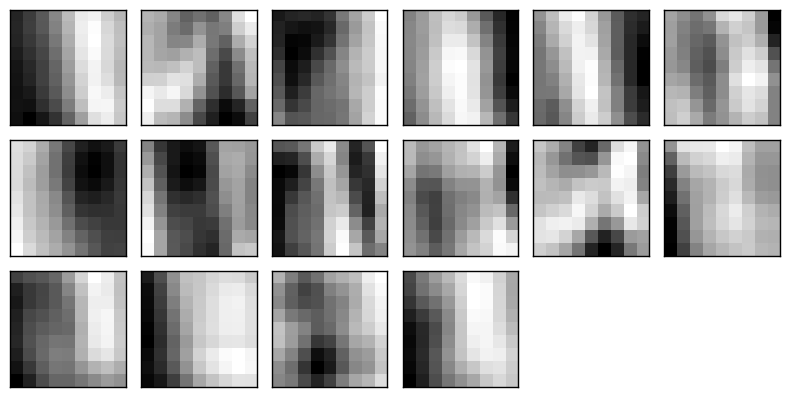

====================camada 5====================
activation_3


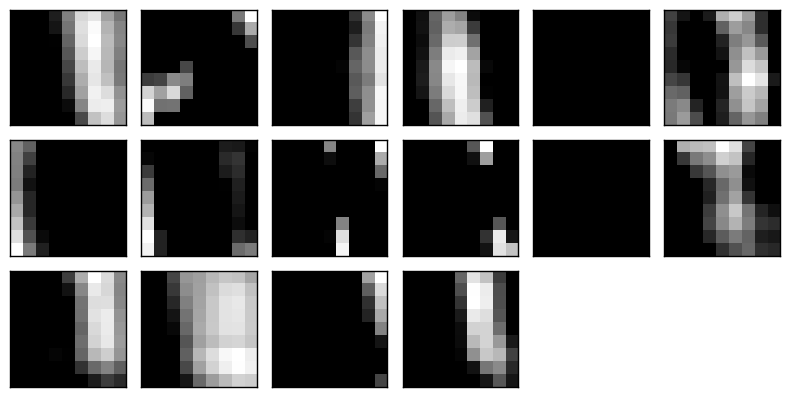

====================camada 6====================
maxpooling2d_1


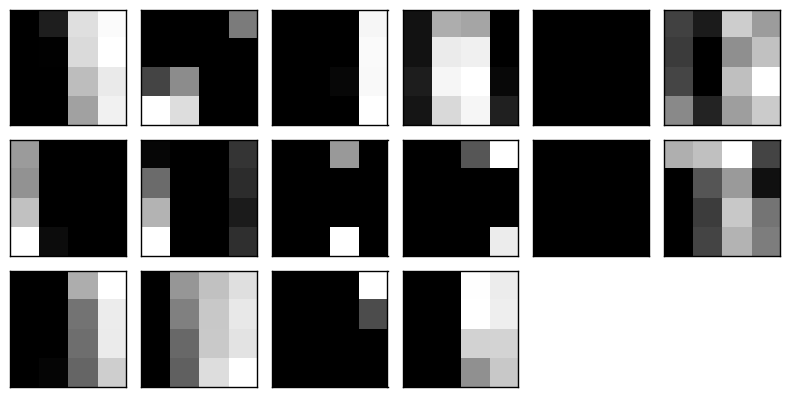

====================camada 7====================
convolution2d_4


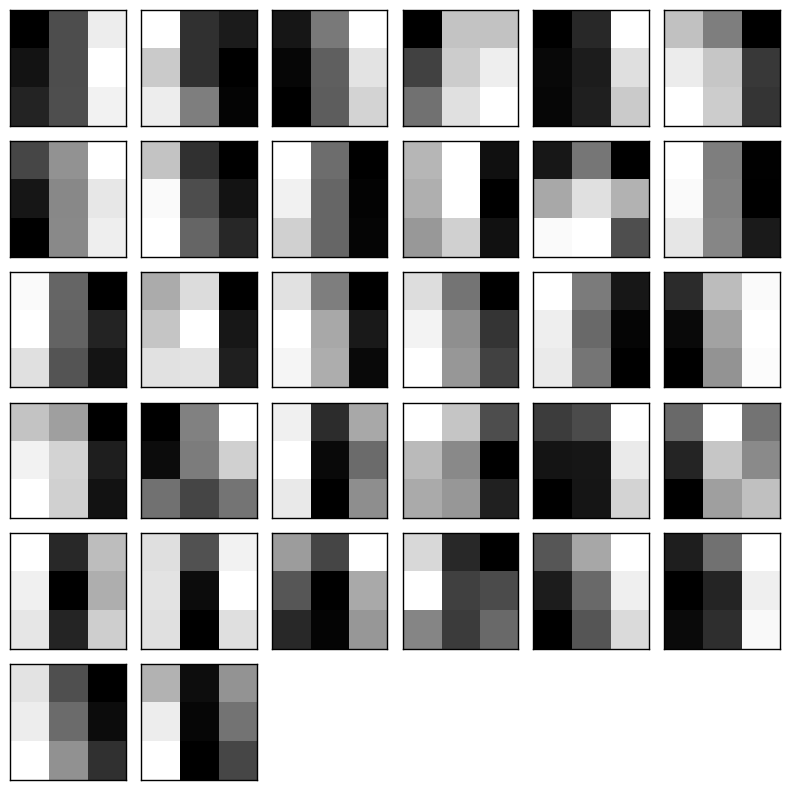

====================camada 8====================
activation_4


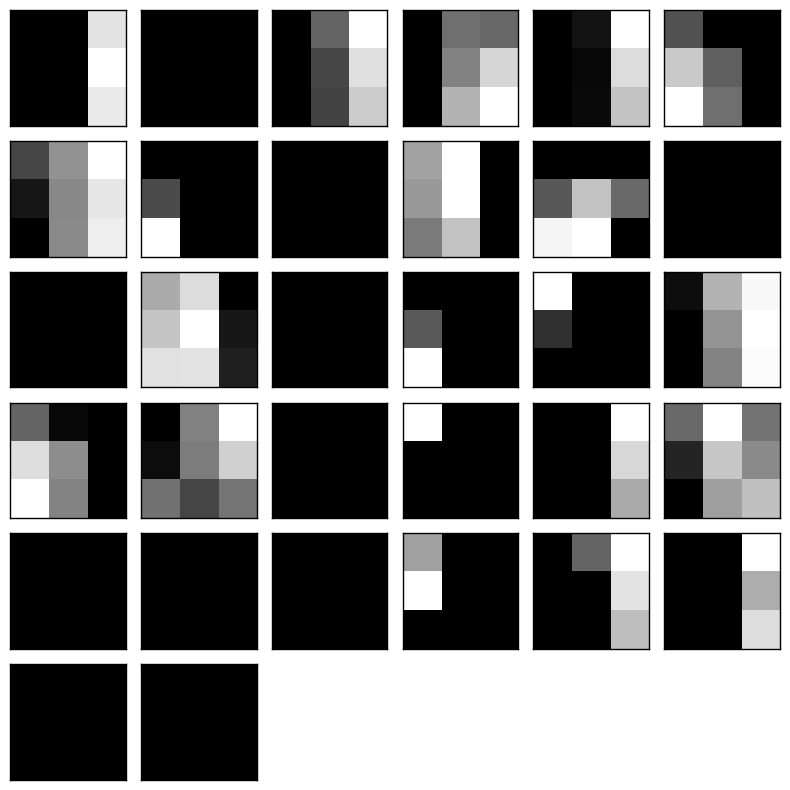

====================camada 9====================
flatten_1


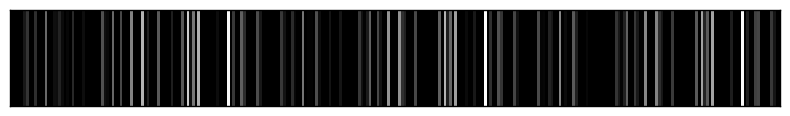

====================camada 10====================
dense_1


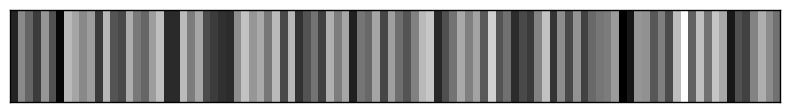

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


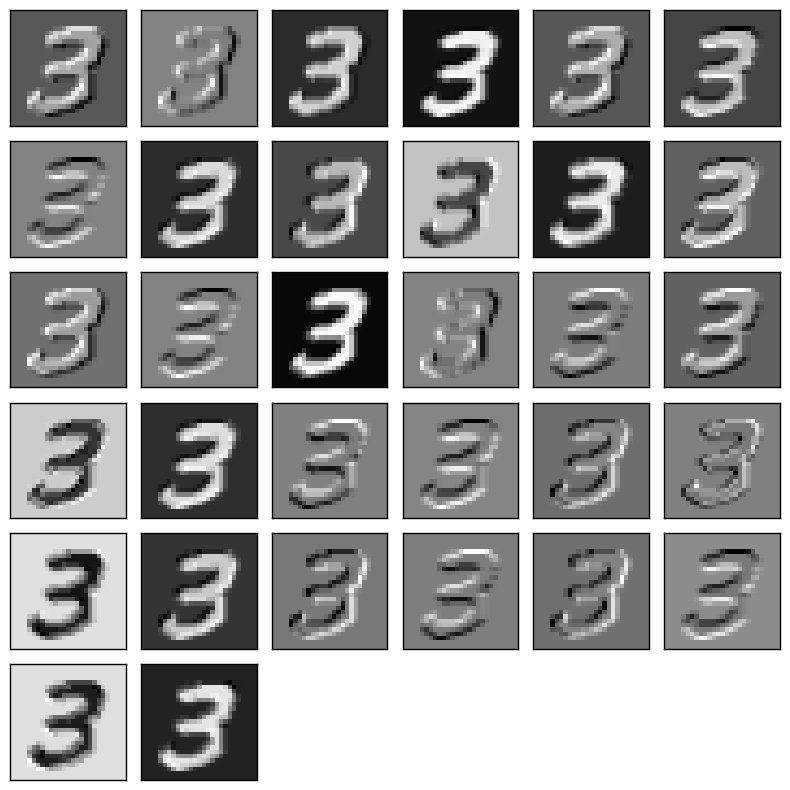

====================camada 1====================
activation_1


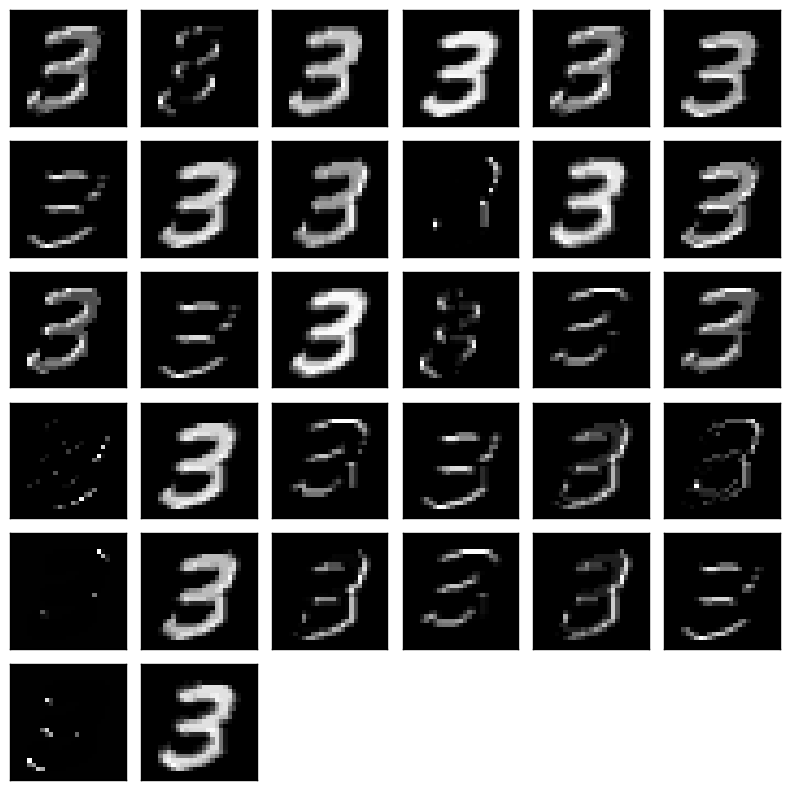

====================camada 2====================
convolution2d_2


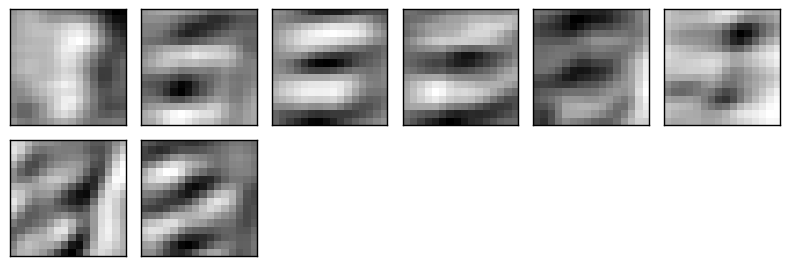

====================camada 3====================
activation_2


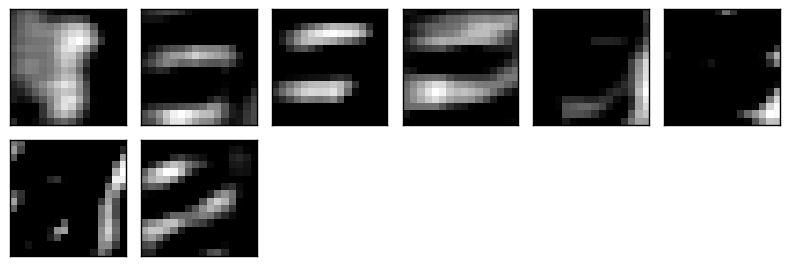

====================camada 4====================
convolution2d_3


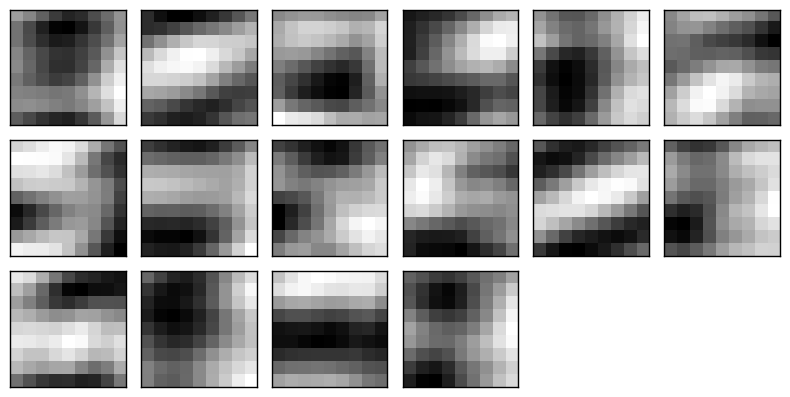

====================camada 5====================
activation_3


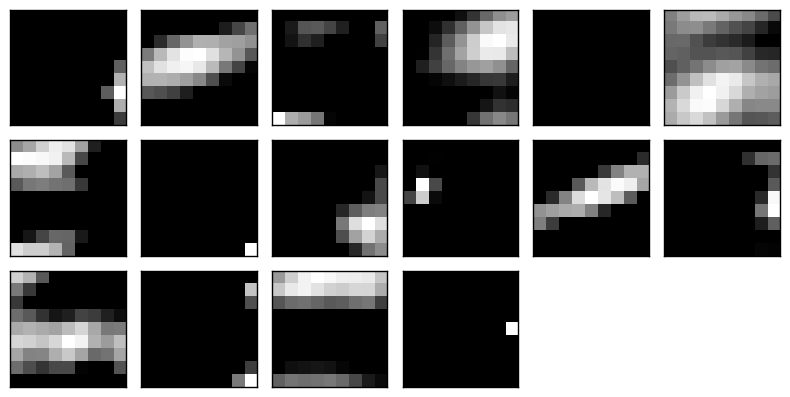

====================camada 6====================
maxpooling2d_1


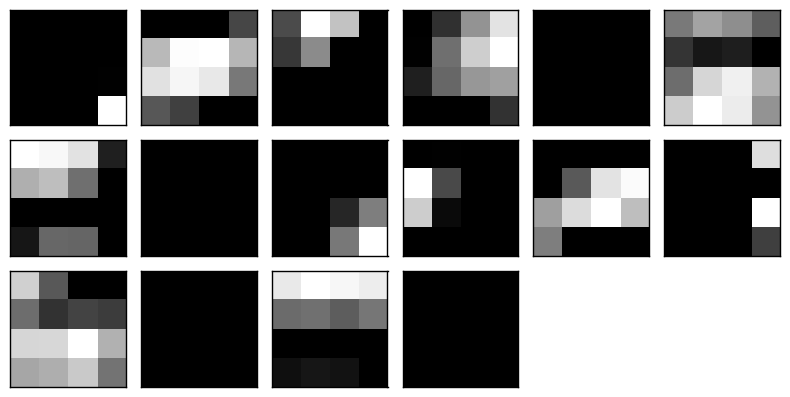

====================camada 7====================
convolution2d_4


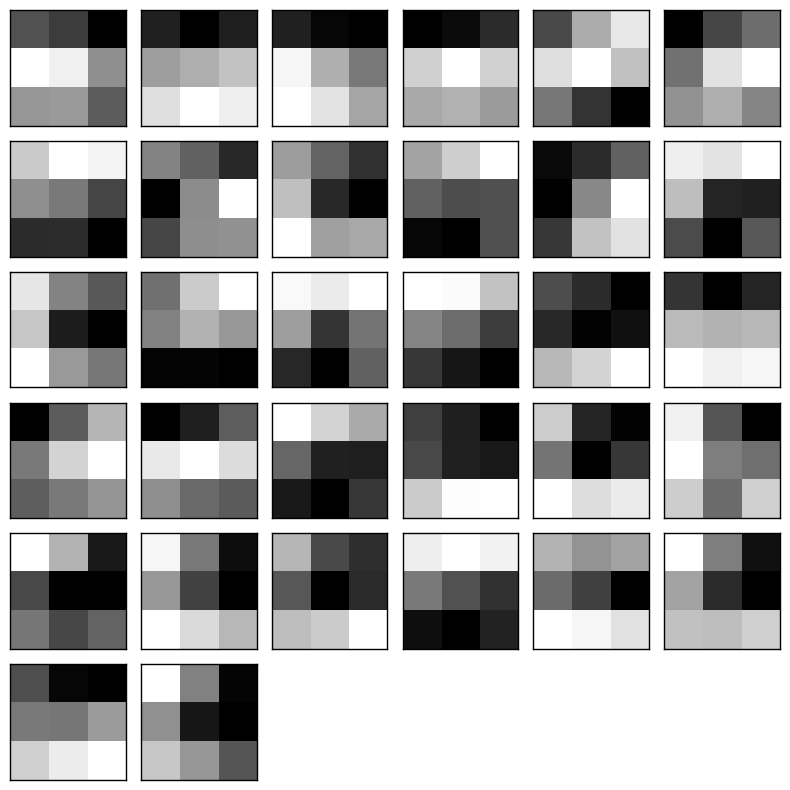

====================camada 8====================
activation_4


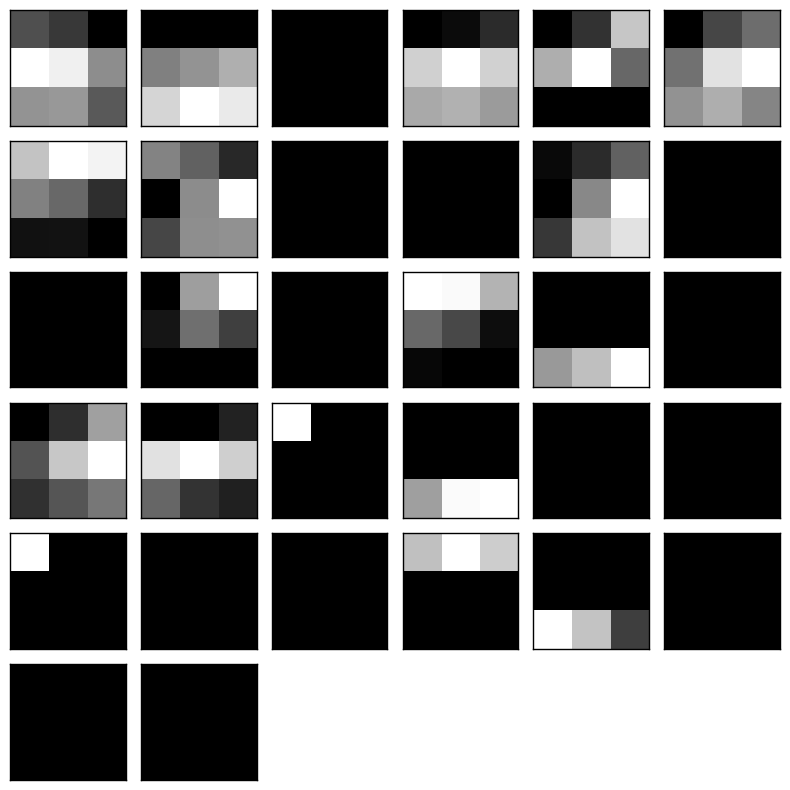

====================camada 9====================
flatten_1


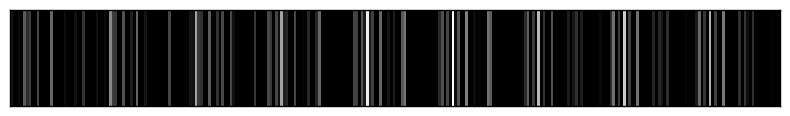

====================camada 10====================
dense_1


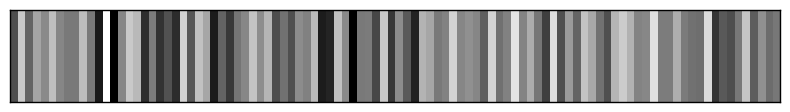

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


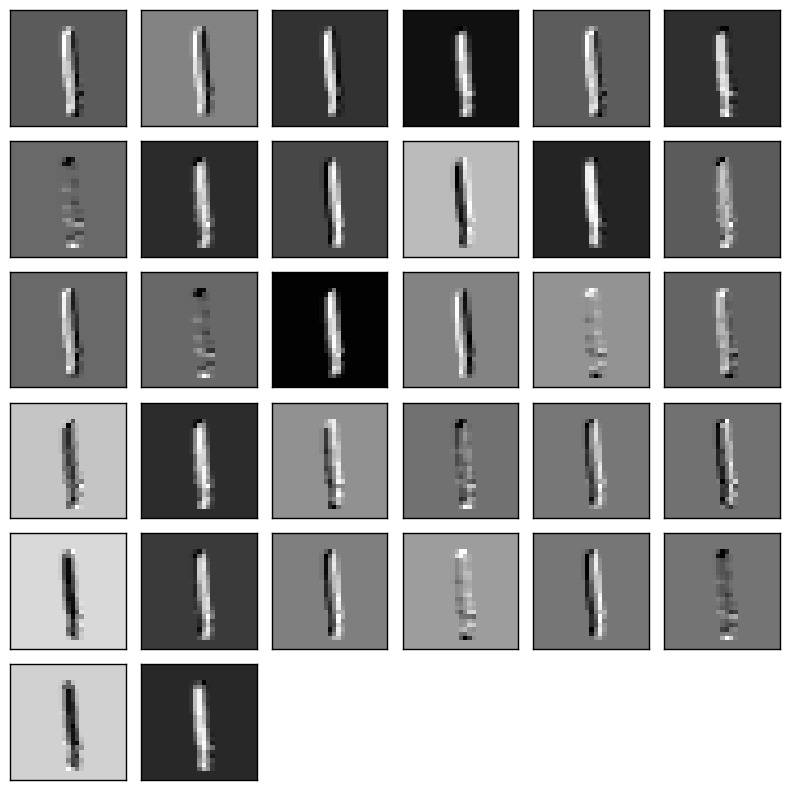

====================camada 1====================
activation_1


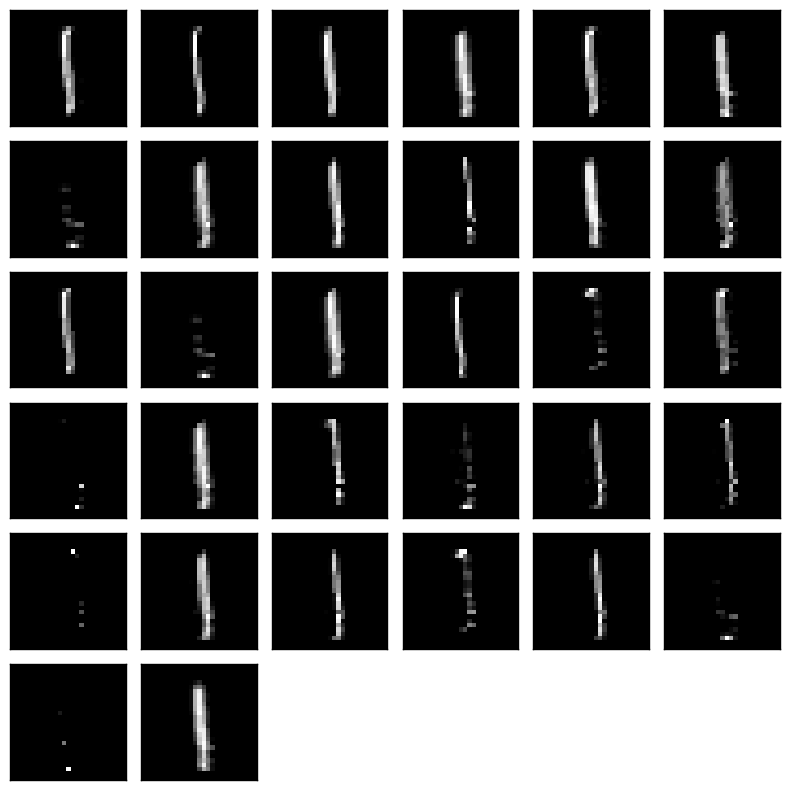

====================camada 2====================
convolution2d_2


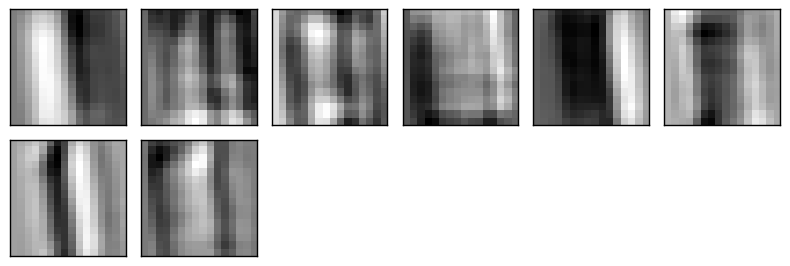

====================camada 3====================
activation_2


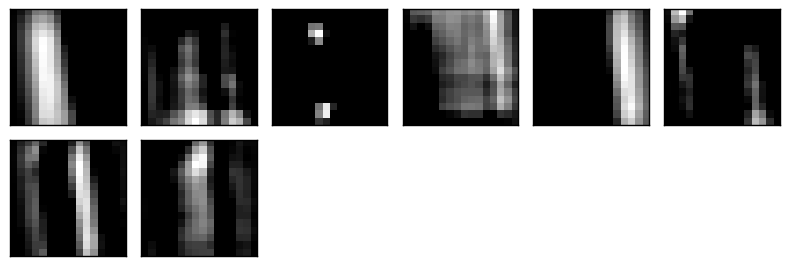

====================camada 4====================
convolution2d_3


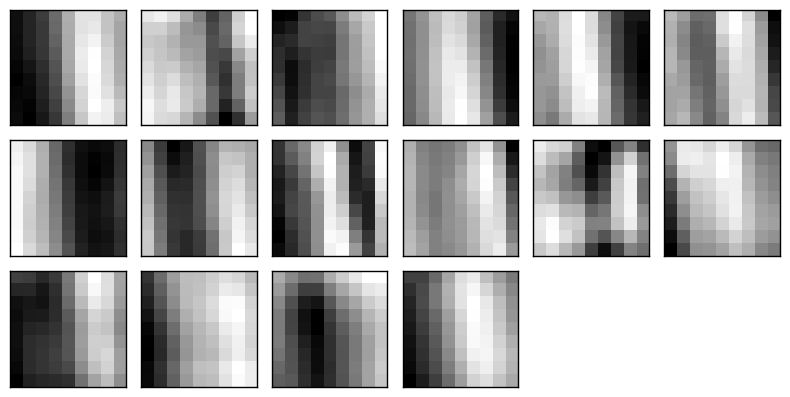

====================camada 5====================
activation_3


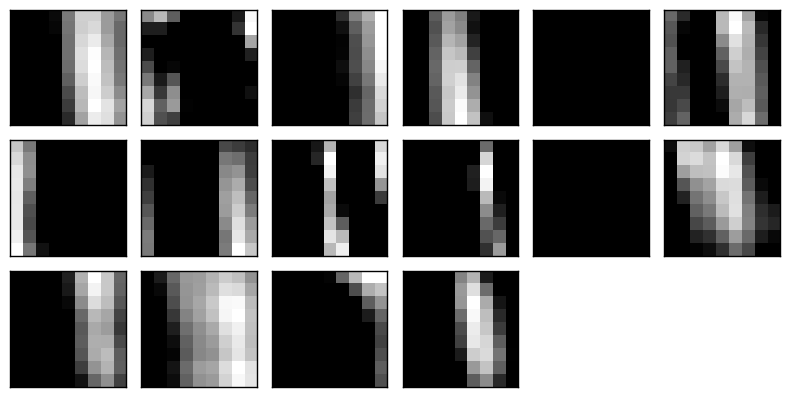

====================camada 6====================
maxpooling2d_1


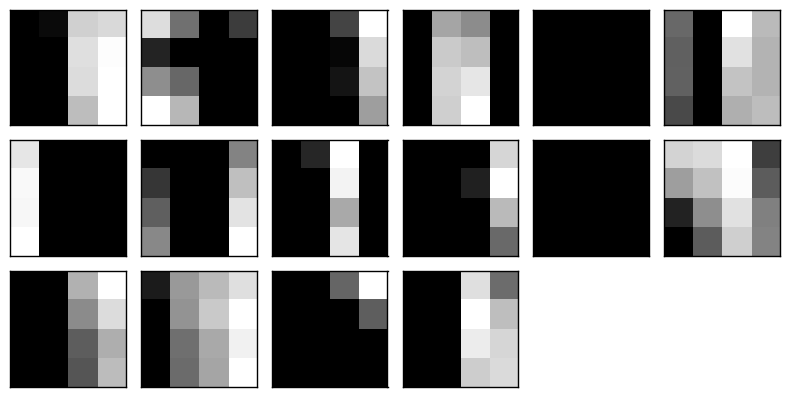

====================camada 7====================
convolution2d_4


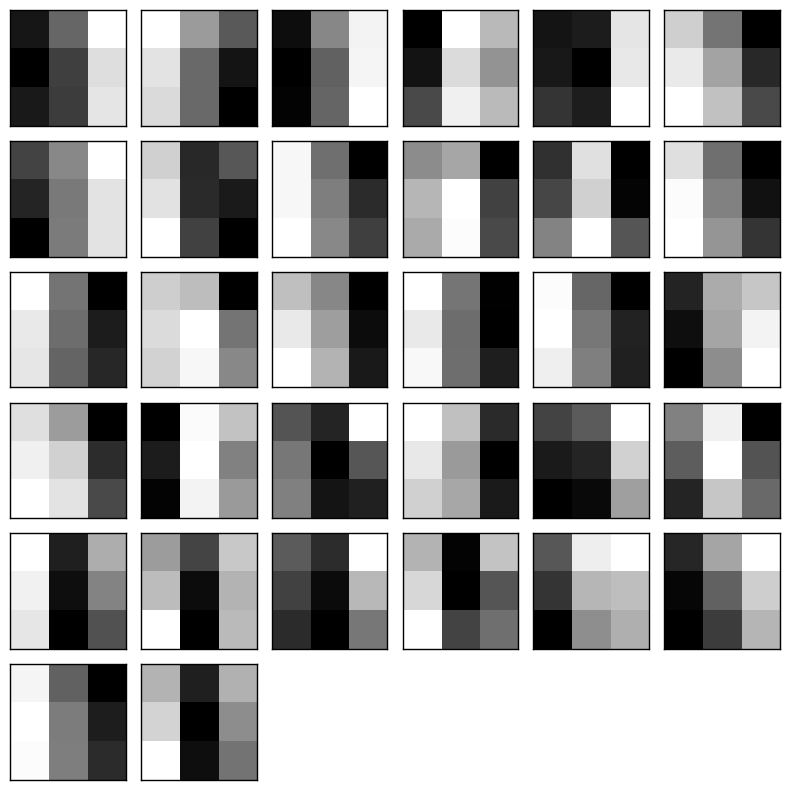

====================camada 8====================
activation_4


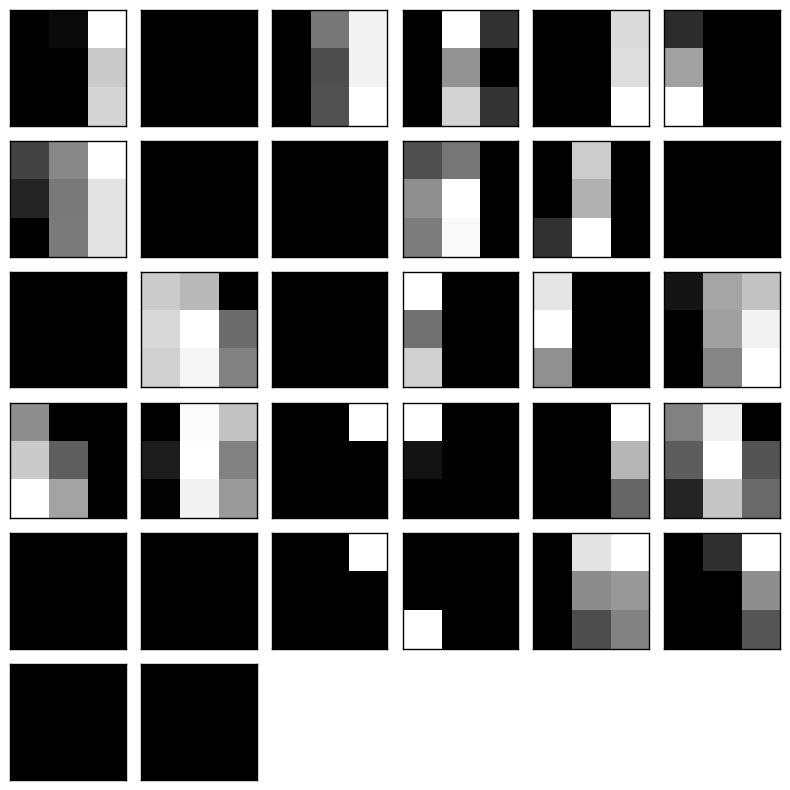

====================camada 9====================
flatten_1


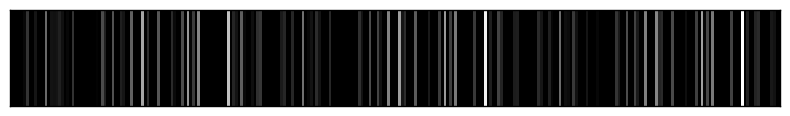

====================camada 10====================
dense_1


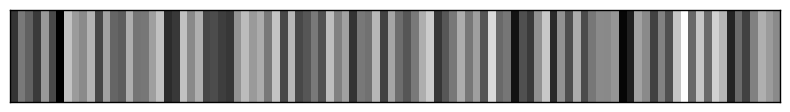

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6
====================camada 0====================
convolution2d_1


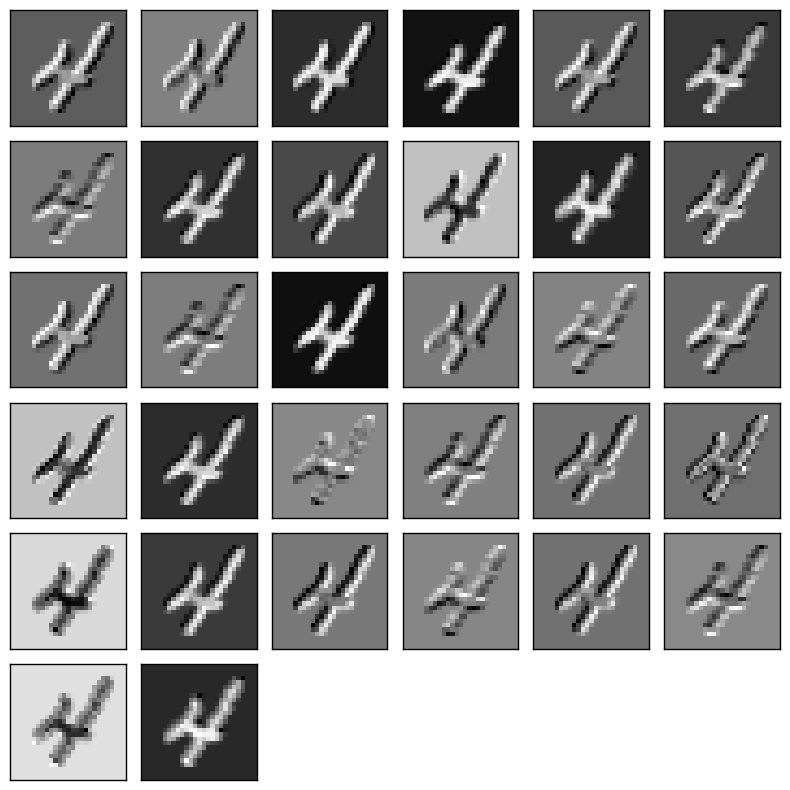

====================camada 1====================
activation_1


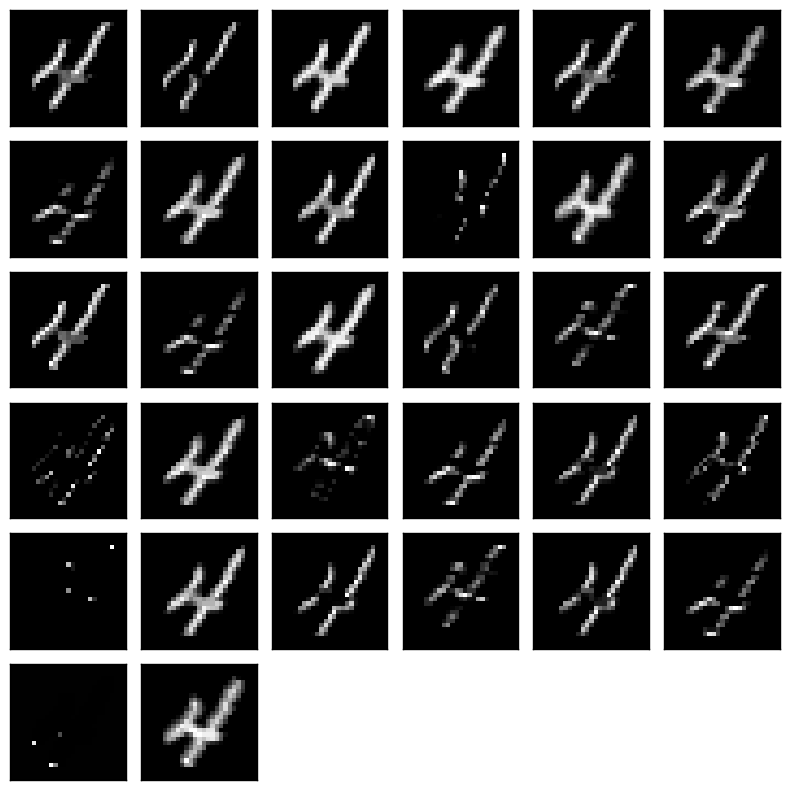

====================camada 2====================
convolution2d_2


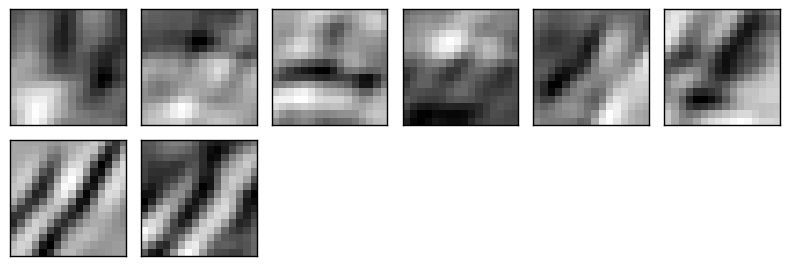

====================camada 3====================
activation_2


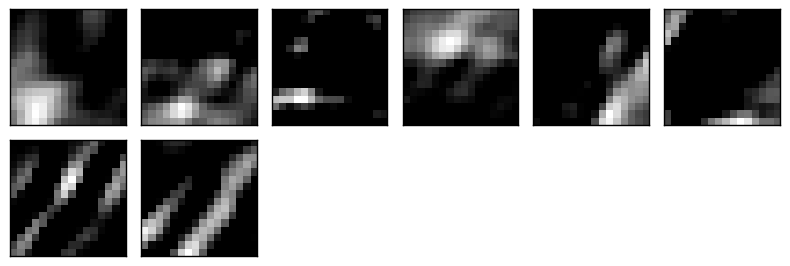

====================camada 4====================
convolution2d_3


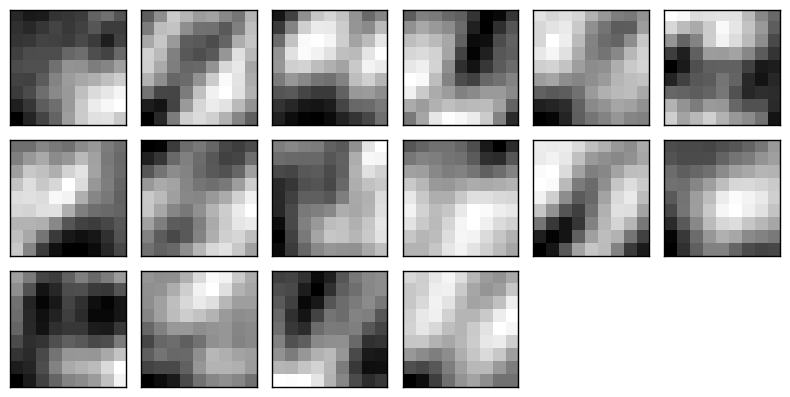

====================camada 5====================
activation_3


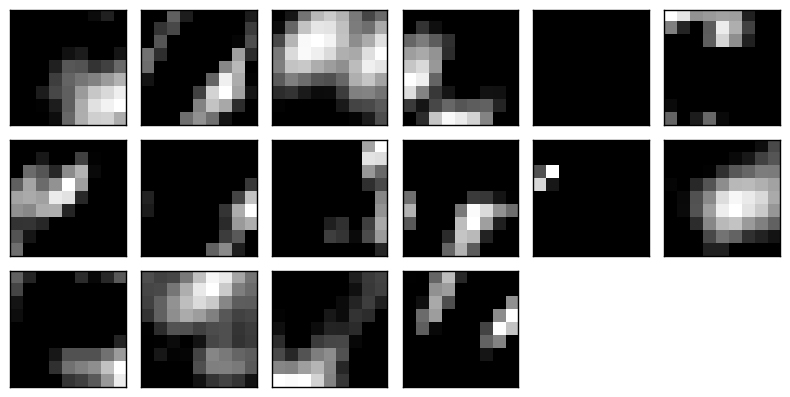

====================camada 6====================
maxpooling2d_1


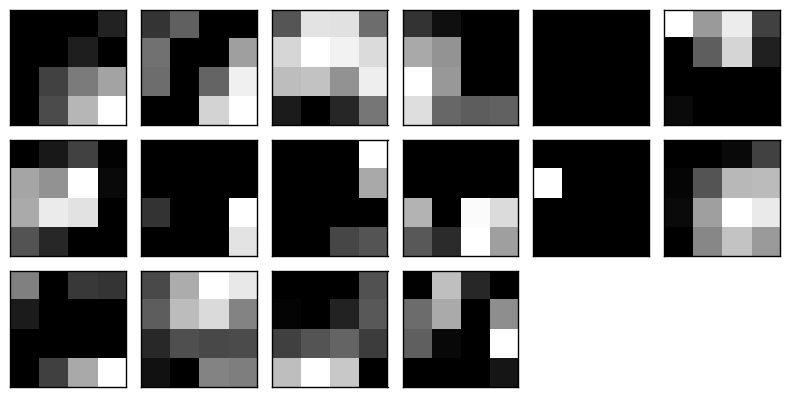

====================camada 7====================
convolution2d_4


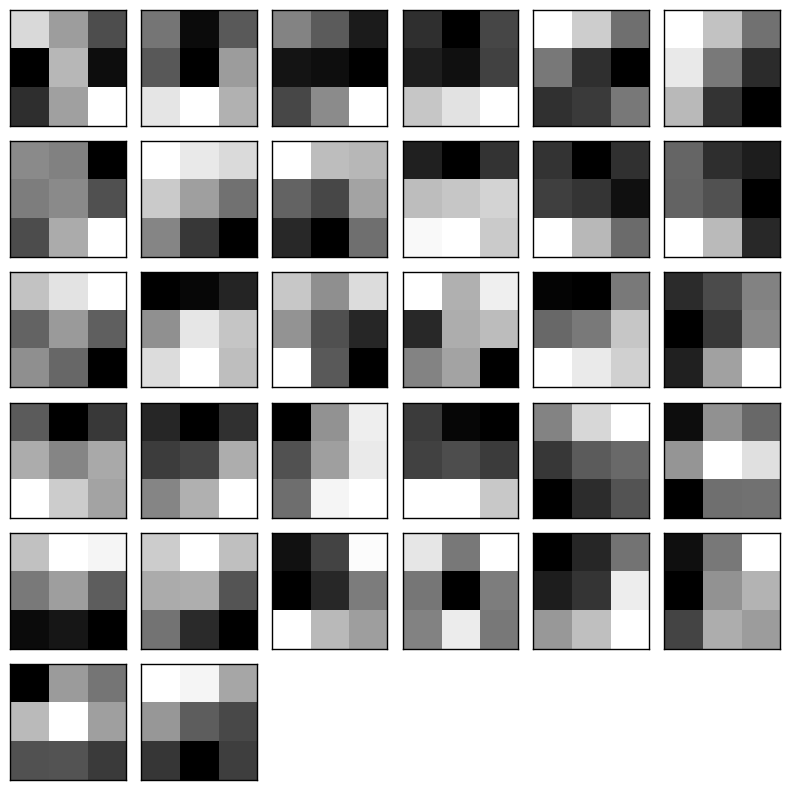

====================camada 8====================
activation_4


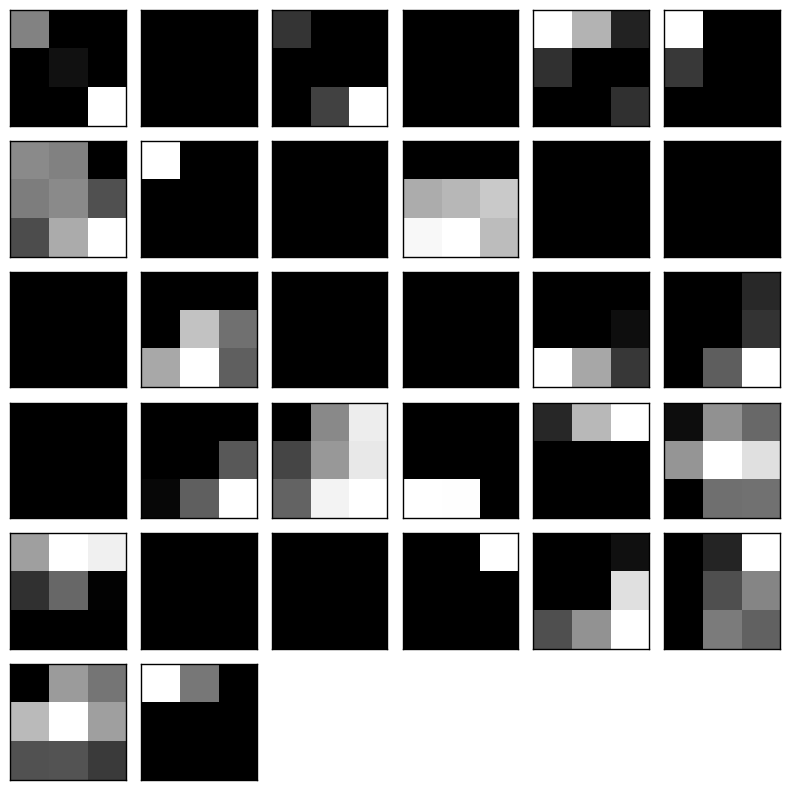

====================camada 9====================
flatten_1


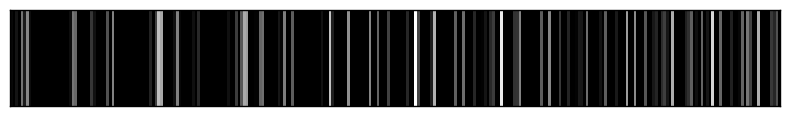

====================camada 10====================
dense_1


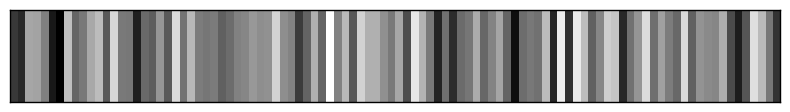

====================camada 12====================
activation_5
====================camada 13====================
dense_2
====================camada 15====================
activation_6


In [13]:
for num in xrange(10):
    for num_camada_para_ser_visualizada in xrange(len(modelo.layers)):
        try:            
            if "dropout" in modelo.layers[num_camada_para_ser_visualizada].name:
                continue
            print "="*20 + "camada " + str(num_camada_para_ser_visualizada) + "="*20
            print modelo.layers[num_camada_para_ser_visualizada].name
            output_layer = modelo.layers[num_camada_para_ser_visualizada].output
            output_fn = K.function([modelo.layers[0].input], [output_layer])
            output_image = output_fn([X_treino[num:num+1]])[0]
            #print "shape: " + str(np.shape(output_image))

            fig=plt.figure(figsize=(8,8))
            filters=1
            if(len(np.shape(output_image))==4):
                filters = np.shape(output_image[0,:,:,])[2]
            for i in range(filters):
                if len(np.shape(output_image))==4:
                    ax = fig.add_subplot(6, 6, i+1)
                    ax.imshow(output_image[0,:,:,i],interpolation='nearest', cmap=plt.cm.gray) #to see the first filter
                    plt.xticks(np.array([]))
                    plt.yticks(np.array([]))
                    plt.tight_layout()
                elif len(np.shape(output_image))==2:
                    ax = fig.add_subplot(1,1,i+1)
                    s=1*np.shape(output_image)[1]/8
                    output_image = np.transpose(np.repeat(output_image[0],s).reshape((len(output_image[0]),s)))
                    ax.imshow(output_image[:],interpolation='nearest', cmap=plt.cm.gray) #to see the first filter
                    plt.xticks(np.array([]))
                    plt.yticks(np.array([]))
                    plt.tight_layout()
                    break
            plt.savefig(var_path + '/input_' + str(num) +'_layer_' + modelo.layers[num_camada_para_ser_visualizada].name + '.png')
            plt.show()
        except:
            pass